In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime


from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob


# This is my preprocessing function, which I run on each grib file

# Load, preprocess, append, and concatenate all the grib files. In this notebook I ran it on half of the data available.

### I will comment the code below for pr_sfc. I repeat the code for each variable separiately. I could loop it for a list of varname =[ 'pr_sfc' , ....] but I preferred keeping it separate.

In [2]:
from dask.distributed import Client
# just have dask figure everything out
client = Client()
client

<Client: 'tcp://127.0.0.1:38951' processes=8 threads=32, memory=100.77 GB>

In [3]:
from glob import glob
variable_names = ['pr_sfc']

def ppf2_filename(ds,filename):
    # rename coordinates
    ds  = ds.rename({ 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'time'})
    # getting start time from file name
    ts = filename.split('_')
#     print(ts)
    whereGEFS = ts.index('GEFS')
#     print(whereGEFS)
    dateSstr = ts[whereGEFS+1]
#     print(dateSstr)
    dateS = datetime.strptime(dateSstr, '%d%b%Y')
#     print(dateS)
    
    Mvalue = np.int(float(np.asarray(ts[-1][2:4])))

    ds.coords['S'] = 'S', np.atleast_1d(dateS)
    ds.coords['M'] = 'M', np.atleast_1d(Mvalue)
    
    ds.coords['time']=np.array([  43200000000000,  129600000000000,  216000000000000,
        302400000000000,  388800000000000,  475200000000000,
        561600000000000,  648000000000000,  734400000000000,
        820800000000000,  907200000000000,  993600000000000,
       1080000000000000, 1166400000000000, 1252800000000000,
       1339200000000000, 1425600000000000, 1512000000000000,
       1598400000000000, 1684800000000000, 1771200000000000,
       1857600000000000, 1944000000000000, 2030400000000000,
       2116800000000000, 2203200000000000, 2289600000000000,
       2376000000000000, 2462400000000000, 2548800000000000,
       2635200000000000, 2721600000000000, 2808000000000000,
       2894400000000000, 2980800000000000],
      dtype='timedelta64[ns]')

    # select US
    ds = ds.sel(lat=slice(50,23), lon=slice(230,300))
#     print(ds)
    return ds

def read_netcdfs(files, dim, transform_func=None):
    def process_one_path(path):
        # use a context manager, to ensure the file gets closed after use
#         print(path)
        with xr.open_dataset(path, engine='pynio', chunks={}) as ds:
            # transform_func should do some sort of selection or
            # aggregation
            if transform_func is not None:
                ds = transform_func(ds, path)
            # load all data from the transformed dataset, to ensure we can
            # use it after closing each original file
#             print(ds)
#             ds.load()
            return ds
#     print(files)
    paths = sorted(glob(files))
#     print(paths)
    datasets = [process_one_path(p) for p in paths]
    
    combined = xr.combine_by_coords(datasets)
    combined = combined.chunk({'S':4,'M':-1})
    return combined

var_l=[]
for ivx, ivar in enumerate(variable_names):
    print(ivar)
    if ivar in os.listdir('/Data2/SubX/EMC/GEFS/'):
        c_l = []
        for iy in np.arange(1999, 2017):#2017
            print(iy)
            # here we suppose we only care about the combined mean of each file;
            # you might also use indexing operations like .sel to subset datasets
            combined = read_netcdfs('/Data2/SubX/EMC/GEFS/'+ivar+'/'+np.str(iy)+'/*/*.grb2', dim=['S','M'],
                                    transform_func=ppf2_filename)
            
            c_l.append(combined)
    all_values = xr.concat(c_l, dim='S') 
    var_l.append(all_values)


pr_sfc
1999
2000
2001


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40900 remote=tcp://127.0.0.1:38951>


2002


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40906 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40910 remote=tcp://127.0.0.1:38951>


2003


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40912 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40914 remote=tcp://127.0.0.1:38951>


2004
2005


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40916 remote=tcp://127.0.0.1:38951>


2006


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40918 remote=tcp://127.0.0.1:38951>


2007


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40920 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40922 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40944 remote=tcp://127.0.0.1:38951>


2008


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40946 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40948 remote=tcp://127.0.0.1:38951>


2009


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40950 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40952 remote=tcp://127.0.0.1:38951>


2010


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40954 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40956 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40958 remote=tcp://127.0.0.1:38951>


2011


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40960 remote=tcp://127.0.0.1:38951>


2012


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40962 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40964 remote=tcp://127.0.0.1:38951>


2013


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40966 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40968 remote=tcp://127.0.0.1:38951>


2014


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40970 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40972 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40974 remote=tcp://127.0.0.1:38951>


2015


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40976 remote=tcp://127.0.0.1:38951>


2016


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40978 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40980 remote=tcp://127.0.0.1:38951>


In [4]:
all_variables = xr.merge(var_l)
all_variables

<xarray.Dataset>
Dimensions:          (M: 10, S: 939, lat: 28, lon: 71, time: 35)
Coordinates:
  * lon              (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * M                (M) int64 0 1 2 3 4 5 6 7 8 9
  * time             (time) timedelta64[ns] 0 days 12:00:00 ... 34 days 12:00:00
  * lat              (lat) float32 50.0 49.0 48.0 47.0 ... 26.0 25.0 24.0 23.0
  * S                (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-28
Data variables:
    APCP_P1_L1_GLL0  (S, M, time, lat, lon) float32 dask.array<chunksize=(4, 10, 35, 28, 71), meta=np.ndarray>

In [5]:
all_variables = all_variables.rename({'APCP_P1_L1_GLL0':'pr_sfc'})

In [6]:
all_variables

<xarray.Dataset>
Dimensions:  (M: 10, S: 939, lat: 28, lon: 71, time: 35)
Coordinates:
  * lon      (lon) float32 230.0 231.0 232.0 233.0 ... 297.0 298.0 299.0 300.0
  * M        (M) int64 0 1 2 3 4 5 6 7 8 9
  * time     (time) timedelta64[ns] 0 days 12:00:00 ... 34 days 12:00:00
  * lat      (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 27.0 26.0 25.0 24.0 23.0
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
Data variables:
    pr_sfc   (S, M, time, lat, lon) float32 dask.array<chunksize=(4, 10, 35, 28, 71), meta=np.ndarray>

In [7]:
all_variables = all_variables.load()

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40982 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40986 remote=tcp://127.0.0.1:38951>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40988 remote=tcp://127.0.0.1:38951>


In [8]:
all_variables.coords['target_time'] = all_variables.S+all_variables.time


# Does climatology depend on lead times?

# calculate climatology for a handful of Target dates (3 day accumulated rain) by pooling 5 S dates and a range of L 1-5, 7-11, 13-17

In [9]:
# Generate target time to check on L dependnece 
target = [ '1900-'+np.str(month).zfill(2)+'-'+np.str(15).zfill(2) for month in np.arange(1,13)]
# transform them in correct dtype
target = [np.datetime64(it) for it in target ]
target = [pd.DatetimeIndex([it]) for it in target ]

In [10]:
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES'  

i_v_u ='EMC/.GEFS'
#                'GMAO/.GEOS_V2p1',
#                'NRL/.NESM',
#                'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              #]

ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3+MASK_url2)
ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)

ds_mask = ds_mask.rename({'X':'lon', 'Y':'lat'})
ds_mask = ds_mask.isel(objectid=0, drop=True)
ds_mask.coords['lon'] = ds_mask.lon+360.



# re do this with accumulated 3 day rainfall. The accumulation (rolling sum) is done along L

In [25]:
all_variables_3L = all_variables.rolling(time=3).sum()


# The rolling sum assign the right edge value of the interval

In [26]:
all_variables_3L.pr_sfc[0,0,:,10,20]

<xarray.DataArray 'pr_sfc' (time: 35)>
array([           nan,            nan,  1.0000000e-01,  1.0000000e-01,
        1.0000000e-01,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  3.4000001e+00,  6.6999998e+00,  7.2999997e+00,
        1.2400000e+01,  9.0999994e+00,  8.4999990e+00, -9.5367432e-07,
        3.9999990e+00,  3.9999990e+00,  3.9999990e+00, -9.5367432e-07,
       -9.5367432e-07,  9.9999048e-02,  2.9999906e-01,  2.9999906e-01,
        1.9999906e-01, -9.3877316e-07,  1.9999906e-01,  1.9999906e-01,
        1.9999906e-01, -9.3877316e-07,  9.9999063e-02,  9.9999063e-02,
        9.9999063e-02,  9.9999905e-01,  9.9999905e-01], dtype=float32)
Coordinates:
    lon          float32 250.0
    M            int64 0
  * time         (time) timedelta64[ns] 0 days 12:00:00 ... 34 days 12:00:00
    lat          float32 40.0
    S            datetime64[ns] 1999-01-06
    target_time  (time) datetime64[ns] 1999-01-06T12:00:00 ... 1999-02-09T12:00:00

# Here I switch to the left edge of the interval

In [27]:
all_variables_3L.coords['time'] = all_variables_3L.time.values-np.timedelta64(2,'D')

# And drop the first 2 empty values

In [28]:
all_variables_3L = all_variables_3L.isel(time=slice(2,36))
all_variables_3L.pr_sfc[0,0,:,10,20]

<xarray.DataArray 'pr_sfc' (time: 33)>
array([ 1.0000000e-01,  1.0000000e-01,  1.0000000e-01,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  3.4000001e+00,
        6.6999998e+00,  7.2999997e+00,  1.2400000e+01,  9.0999994e+00,
        8.4999990e+00, -9.5367432e-07,  3.9999990e+00,  3.9999990e+00,
        3.9999990e+00, -9.5367432e-07, -9.5367432e-07,  9.9999048e-02,
        2.9999906e-01,  2.9999906e-01,  1.9999906e-01, -9.3877316e-07,
        1.9999906e-01,  1.9999906e-01,  1.9999906e-01, -9.3877316e-07,
        9.9999063e-02,  9.9999063e-02,  9.9999063e-02,  9.9999905e-01,
        9.9999905e-01], dtype=float32)
Coordinates:
    lon          float32 250.0
    M            int64 0
  * time         (time) timedelta64[ns] 0 days 12:00:00 ... 32 days 12:00:00
    lat          float32 40.0
    S            datetime64[ns] 1999-01-06
    target_time  (time) datetime64[ns] 1999-01-08T12:00:00 ... 1999-02-09T12:00:00

# Update the target time, because those have not changed and they are still linked to the right edge of the interval

In [29]:
all_variables_3L.coords['target_time'] = all_variables_3L.S+all_variables_3L.time
all_variables_3L

<xarray.Dataset>
Dimensions:      (M: 10, S: 939, lat: 28, lon: 71, time: 33)
Coordinates:
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * M            (M) int64 0 1 2 3 4 5 6 7 8 9
  * time         (time) timedelta64[ns] 0 days 12:00:00 ... 32 days 12:00:00
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * S            (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-28
    target_time  (S, time) datetime64[ns] 1999-01-06T12:00:00 ... 2017-01-29T12:00:00
Data variables:
    pr_sfc       (S, M, time, lat, lon) float32 10.5 3.5 ... 1.3400015 1.0199976

In [30]:
all_variables_T3 = all_variables_3L.stack(St=('S','time'))
all_variables_T3 = all_variables_T3.swap_dims({'St':'target_time'})
all_variables_T3 = all_variables_T3.unstack()


In [165]:
all_variables_3L

<xarray.Dataset>
Dimensions:      (M: 10, S: 939, lat: 28, lon: 71, time: 33)
Coordinates:
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * M            (M) int64 0 1 2 3 4 5 6 7 8 9
  * time         (time) timedelta64[ns] 0 days 12:00:00 ... 32 days 12:00:00
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * S            (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-28
    target_time  (S, time) datetime64[ns] 1999-01-06T12:00:00 ... 2017-01-29T12:00:00
Data variables:
    pr_sfc       (S, M, time, lat, lon) float32 10.5 3.5 ... 1.3400015 1.0199976

In [167]:
all_variables_3L.to_netcdf('all_variables_3L_aug2020.nc')

In [32]:
target

[DatetimeIndex(['1900-01-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-02-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-03-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-04-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-05-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-06-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-07-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-08-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-09-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-10-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-11-15'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-12-15'], dtype='datetime64[ns]', freq=None)]

In [19]:
# Generate target time to check on L dependnece 
target_all = pd.date_range('1900-01-01', periods=365, freq='D')
target_all = [pd.DatetimeIndex([it]) for it in target_all]
# target_all

In [20]:
target_all

[DatetimeIndex(['1900-01-01'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-02'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-03'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-04'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-05'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-06'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-07'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-08'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-09'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-10'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-11'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-12'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-13'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-14'], dtype='datetime64[ns]', freq=None),
 DatetimeIndex(['1900-01-15'], dtype='datetime64[ns]', freq=No

In [21]:
#client.restart()

In [42]:
# looping through the target dates for climatologies
ds_clim_test_3d_all = []
for iT in target_all:
    print(iT,)
    # extract values that correspond to the target dates
    temp = all_variables_T3.where((all_variables_T3.target_time.dt.month==iT.month.values[0])&
                              (all_variables_T3.target_time.dt.day==iT.day.values[0]), drop=True)
    
    # bits to extract the S and t of each target_time
    y_ls = [y for (x,y) in temp.St.values]
    y_arr = np.array(y_ls)
    # loop through the 3 types of lead times
    # I have the -1 because of the way the timedelta is centered at 0 day and 12hours for day 1
#     for different_lead1, different_lead2 in zip(np.array([1,7,13])-1, np.array([5,11,17])-1 ):
#     for different_lead1, different_lead2 in zip(np.array([2,4,6,8])-1, np.array([10,12,14,16])-1 ):
    firststep=0
    for different_lead1, different_lead2 in zip(np.array([4,6,8,4,4,14])-1, np.array([12,14,16,22,33,33])-1 ):
        firststep+=1
#         print(y_arr[(y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D'))])
        temp2 = temp.sel(target_time=
                         (y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D')))
        temp3 = temp2.stack(Mtt=('M','target_time'))
#         temp3 = temp3.load()
#         print(temp3.pr_sfc.values.shape)
        temp3 = temp3.quantile(dim=['Mtt'], q=[0.15,0.33,0.5,0.667,0.85])
        temp3 = temp3.expand_dims('Lbeg')
        temp3.coords['Lbeg'] = 'Lbeg', [np.str(different_lead1+1)+'-'+np.str(different_lead2+1)] #np.atleast_1d(different_lead1+1)
#         print(temp3)
#         if different_lead1==3: #whatever first value of different_lead1
        if firststep==1: #whatever first value of different_lead1
            ds_quantile = temp3*1.
        else:
            ds_quantile = xr.merge([ds_quantile,temp3])
    ds_quantile = ds_quantile.expand_dims('target_clim')
    ds_quantile.coords['target_clim'] = 'target_clim', np.atleast_1d(iT)
    ds_clim_test_3d_all.append(ds_quantile)
ds_clim_test_3d_all = xr.combine_by_coords(ds_clim_test_3d_all)    


DatetimeIndex(['1900-01-01'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-02'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-03'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-04'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-05'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-06'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-07'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-08'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-09'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-10'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-11'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-12'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-13'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-14'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-15'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-1

DatetimeIndex(['1900-05-08'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-09'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-10'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-11'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-12'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-13'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-14'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-15'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-16'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-17'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-18'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-19'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-20'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-21'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-22'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-2

DatetimeIndex(['1900-09-12'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-13'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-14'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-15'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-16'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-17'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-18'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-19'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-20'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-21'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-22'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-23'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-24'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-25'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-26'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-2

In [43]:
ds_quantile

<xarray.Dataset>
Dimensions:      (Lbeg: 6, lat: 28, lon: 71, quantile: 5, target_clim: 1)
Coordinates:
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * quantile     (quantile) float64 0.15 0.33 0.5 0.667 0.85
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * target_clim  (target_clim) datetime64[ns] 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, quantile, lat, lon) float64 3.835 ... 12.7

In [44]:
all_variables_3L

<xarray.Dataset>
Dimensions:      (M: 10, S: 939, lat: 28, lon: 71, time: 33)
Coordinates:
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * M            (M) int64 0 1 2 3 4 5 6 7 8 9
  * time         (time) timedelta64[ns] 0 days 12:00:00 ... 32 days 12:00:00
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * S            (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-28
    target_time  (S, time) datetime64[ns] 1999-01-06T12:00:00 ... 2017-01-29T12:00:00
Data variables:
    pr_sfc       (S, M, time, lat, lon) float32 10.5 3.5 ... 1.3400015 1.0199976

In [161]:
all_variables_3T

NameError: name 'all_variables_3T' is not defined

In [ ]:
# times = pd.date_range('2000-01-01', '2010-12-31', name='time')
# annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 366 - 0.28))
# noise = 15 * np.random.rand(annual_cycle.size)
# data = 10 + (15 * annual_cycle) + noise
# da = xr.DataArray(data, coords=[times], dims='time')
# #da.plot()
# #Check variability at one day
# #da.groupby('time.dayofyear').std('time')[0]
# da_clim = da.groupby('time.dayofyear').mean('time')
# _da_clim = xr.concat([da_clim[-15:], da_clim, da_clim[:15]], 'dayofyear')
# da_clim_smooth = _da_clim.rolling(dayofyear=31, center=True).mean().dropna('dayofyear')
# da_clim_smooth.plot()

In [ ]:
# ds_clim_test_3d_all3 = ds_clim_test_3d_all.rolling(target_clim=3, center=True).mean()
# ds_clim_test_3d_all5 = ds_clim_test_3d_all.rolling(target_clim=5, center=True).mean()

# FITTING PROCEDURES

In [45]:
def fffourier(x, *a):
    '''harmonic just with cosine'''
    tau = 366
    ret = a[1] * np.cos(2* np.pi / tau * x)
    for deg in range(2, len(a)):
        ret += a[deg] * np.cos((deg) *2* np.pi / tau * x)
    return ret +a[0]

In [46]:
def fffourierB(x, *a_in):
    '''harmonic with np.exp(sum(sine and cosine))'''
    a_0 = a_in[0]
    len_a = len(a_in)-1
#     print(len_a, int(len_a/2))
    if len_a==3:
        a = a_in[1]
        b = a_in[2]
    else:
        a = a_in[1:int(len_a/2+1)]
        b = a_in[int(len_a/2+1):]
#     print(a,b)
    tau = 365.25
    nu = 2*np.pi/tau
    ret = a_0
    for deg in range(0,int(len_a/2)):
#         print(deg)
#         print(a[deg] , b[deg] )
        ret += a[deg] * np.sin((deg+1) * nu * x) + b[deg] * np.cos((deg+1) * nu * x)
#     if any(np.abs(a))>=19:
#         ret*=10000
#     if any(np.abs(b))>=19:
#         ret*=10000
    return np.exp(ret)

In [ ]:
# from scipy.optimize import curve_fit
# x = ds_clim_test_3d_all.target_clim.dt.dayofyear.values
# y = ds_clim_test_3d_all.pr_sfc[:,3,-1,2,30].values

# # x = np.concatenate((x[290:]-365,x,x[:100]+365))
# # y =  np.concatenate((y[290:],y,y[:100]))
# popt, pcov = curve_fit(fffourierB, x,y, [1]*9)
# # popt, pcov = curve_fit(fffourier, x,y, [0] * 9)
# print(popt)

In [47]:
def apply_fffourier(dsin):
    x = dsin.target_clim.dt.dayofyear.values
#     print(dsin)
#     print(x.shape)
    popt = dsin.H.values
    out = fffourierB(x, *popt)
#     print(out)
#     pause
#     print(popt)
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(out)


In [48]:
from scipy.optimize import curve_fit


In [49]:
def apply_fit_curve_cauchy(dsin):
#     print(dsin.coords)
#     print(loss_f[:])
#     pause
    x = dsin.target_clim.dt.dayofyear.values
#     print(x.shape)
    y = dsin.pr_sfc.values[:,0]
    if np.sum(np.isnan(y))==0:
        y[y<0]=0

#         try:
#             num_armonics = 9
#             popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-15,15])
#         except:
#         try:
        num_armonics = 7
        popt, pcov = curve_fit(fffourierB, x,y, [0.0] * num_armonics, bounds=[-20,20], 
                               max_nfev=3000, loss='cauchy')
#         except:
#             try:
#                 num_armonics = 5
#                 print(5)
#                 print(dsin.coords)
#                 popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-20,20],
#                                         max_nfev=3000, loss='cauchy')
#             except:
#                 try:
#                     num_armonics = 3
#                     print(3)
#                     print(dsin.coords)
#                     popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-20,20], 
#                                             max_nfev=3000, loss='cauchy')
#                 except:
#                     print('failed', dsin)
#                     popt = np.nan*np.ones(3)
    else:
        popt=np.nan*np.ones(7)
        num_armonics = 7

    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(popt, coords=[np.arange(0,num_armonics)], dims='harmonic')


In [50]:
def apply_fit_curve_soft(dsin):
#     print(loss_f[:])
#     pause
    x = dsin.target_clim.dt.dayofyear.values
#     print(x.shape)
    y = dsin.pr_sfc.values[:,0]
    
    if np.sum(np.isnan(y))==0:
        y[y<0]=0

#         try:
#             num_armonics = 9
#             popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-15,15])
#         except:
        try:
            num_armonics = 7
            popt, pcov = curve_fit(fffourierB, x,y, [0.0] * num_armonics, bounds=[-20,20], max_nfev=3000)
        except:
            try:
                num_armonics = 5
                print(5)
                print(dsin.coords)
                popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-20,20],
                                        max_nfev=3000)
            except:
                try:
                    num_armonics = 3
                    print(3)
                    print(dsin.coords)
                    popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-20,20], 
                                            max_nfev=3000)
                except:
                    print('failed', dsin)
                    popt = np.nan*np.ones(3)
    else:
        popt=np.nan*np.ones(7)
        num_armonics = 7

    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(popt, coords=[np.arange(0,num_armonics)], dims='harmonic')


# Apply curve fit


In [51]:
ds_clim_test_3d_all

<xarray.Dataset>
Dimensions:      (Lbeg: 6, lat: 28, lon: 71, quantile: 5, target_clim: 365)
Coordinates:
  * quantile     (quantile) float64 0.15 0.33 0.5 0.667 0.85
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, quantile, lat, lon) float64 3.574 ... 12.7

In [52]:
# stacked = ds_clim_test_3d_all.where(ds_mask.the_geom>0).isel(quantile=slice(-1, None)).stack(
stacked = ds_clim_test_3d_all.where(ds_mask.the_geom>0).sel(quantile=0.85).stack(
    allpoints=['Lbeg','lat','lon'])  
trend = stacked.groupby('allpoints').apply(apply_fit_curve_cauchy)
trend_unstacked = trend.unstack('allpoints')
trend_unstacked = trend_unstacked.rename({'allpoints_level_0':'Lbeg',
                                          'allpoints_level_1':'lat',
                                         'allpoints_level_2':'lon'})
trend_unstacked = trend_unstacked.to_dataset(name='H')
trend_unstacked.coords['target_clim'] = 'target_clim', stacked.target_clim.values


In [53]:
ds1 = ds_clim_test_3d_all.rolling(lat = 3, center=True).mean()
ds2 = ds_clim_test_3d_all.rolling(lon = 3, center=True).mean()
dsroll = (ds1+ds2)/2

In [54]:
stacked = dsroll.where(ds_mask.the_geom>0).sel(quantile=0.85).stack(
    allpoints=['Lbeg','lat','lon'])  
trendroll = stacked.groupby('allpoints').apply(apply_fit_curve_cauchy)
trend_unstackedroll = trendroll.unstack('allpoints')
trend_unstackedroll = trend_unstackedroll.rename({'allpoints_level_0':'Lbeg',
                                          'allpoints_level_1':'lat',
                                         'allpoints_level_2':'lon'})
trend_unstackedroll = trend_unstackedroll.to_dataset(name='H')
trend_unstackedroll.coords['target_clim'] = 'target_clim', stacked.target_clim.values


In [55]:
trend1 = stacked.groupby('allpoints').apply(apply_fit_curve_soft)
trend_unstacked1 = trend1.unstack('allpoints')
trend_unstacked1 = trend_unstacked1.rename({'allpoints_level_0':'Lbeg',
                                          'allpoints_level_1':'lat',
                                         'allpoints_level_2':'lon'})
trend_unstacked1 = trend_unstacked1.to_dataset(name='H')
trend_unstacked1.coords['target_clim'] = 'target_clim', stacked.target_clim.values

<Figure size 432x288 with 0 Axes>

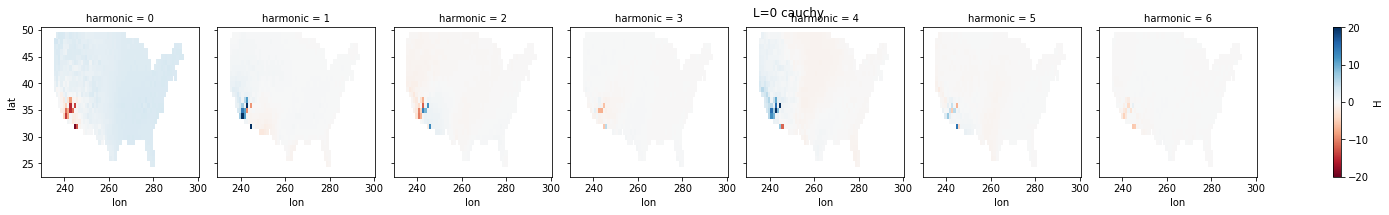

<Figure size 432x288 with 0 Axes>

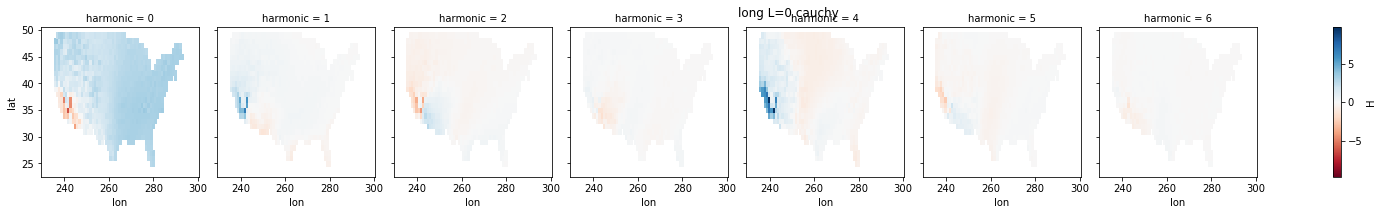

<Figure size 432x288 with 0 Axes>

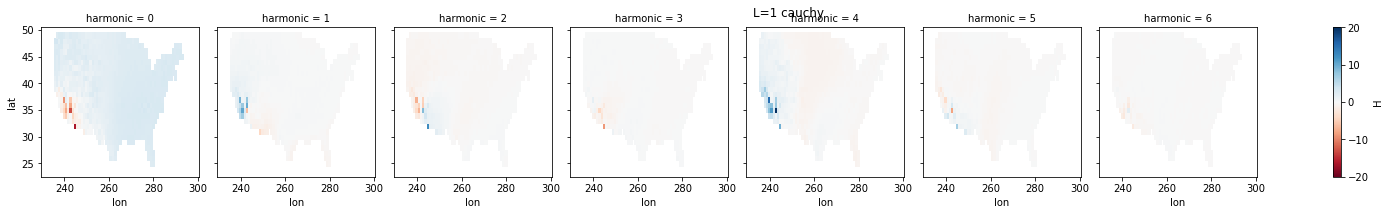

<Figure size 432x288 with 0 Axes>

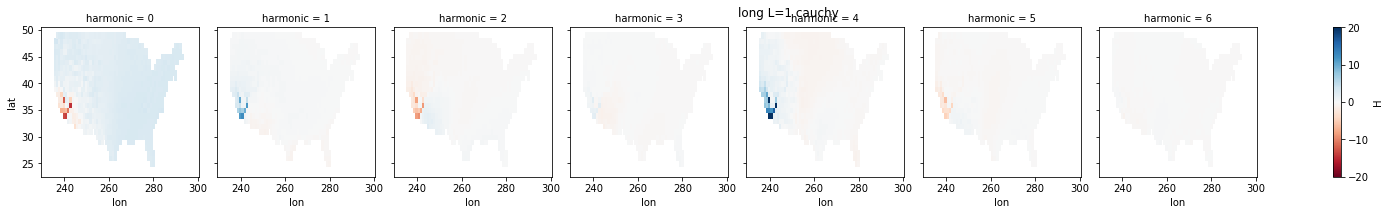

<Figure size 432x288 with 0 Axes>

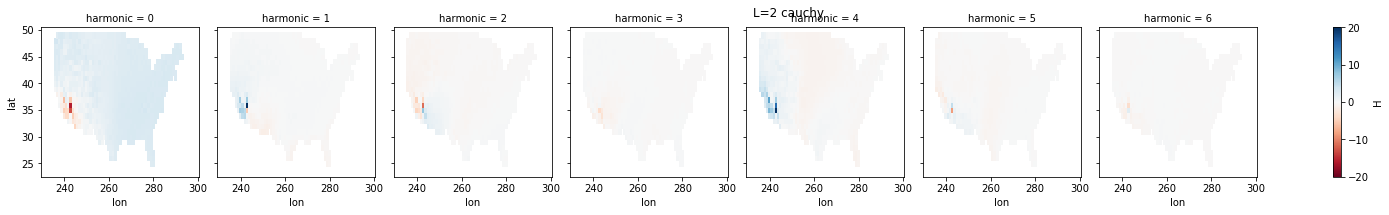

<Figure size 432x288 with 0 Axes>

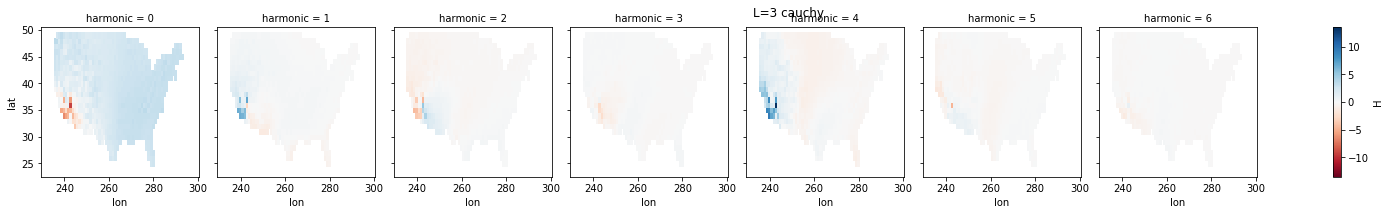

In [58]:
for Li in np.arange(0,4):
    plt.figure()
    trend_unstacked.H[:,Li].where(ds_mask.the_geom>0).plot(col='harmonic', cmap='RdBu')
    plt.suptitle('L='+np.str(Li)+' cauchy')
#     plt.figure()
#     trend_unstacked2.H[:,Li].where(ds_mask.the_geom>0).plot(col='harmonic', cmap='RdBu')
#     plt.suptitle('L='+np.str(Li)+' soft')
    if Li<2:
        plt.figure()    
        trend_unstacked_LongL.H[:,Li].where(ds_mask.the_geom>0).plot(col='harmonic', cmap='RdBu')
        plt.suptitle('long L='+np.str(Li)+' cauchy')
    
    

In [ ]:
for Li in np.arange(0,4):
    plt.figure()
    trend_unstacked.H[:,Li].where(ds_mask.the_geom>0).plot(col='harmonic', cmap='RdBu', vmin=-5,vmax=5)
    plt.suptitle(Li)
    plt.figure()
    trend_unstacked2.H[:,Li].where(ds_mask.the_geom>0).plot(col='harmonic', cmap='RdBu', vmin=-5,vmax=5)
    plt.suptitle(Li)
    
    

In [56]:
trend_unstacked.to_netcdf('harmonics_from_quantiles_cauchy_aug2020.nc')
trend_unstackedroll.to_netcdf('harmonics_from_quantiles_cauchy_smoothedspace_aug2020.nc')
trend_unstacked1.to_netcdf('harmonics_from_quantiles_soft_aug2020.nc')


In [60]:
ds_clim_test_3d_all.to_netcdf('ds_clim_test_3d_all_aug2020.nc')

In [160]:
ds_clim_test_3d_all

<xarray.Dataset>
Dimensions:      (Lbeg: 6, lat: 28, lon: 71, quantile: 5, target_clim: 365)
Coordinates:
  * quantile     (quantile) float64 0.15 0.33 0.5 0.667 0.85
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, quantile, lat, lon) float64 3.574 ... 12.7

# Rebuild data based on coefficients

In [57]:
stack1 = trend_unstacked.stack(allpoints=['Lbeg','lat','lon'])  
smooth_clim = stack1.groupby('allpoints').apply(apply_fffourier)
smooth_clim = smooth_clim.unstack('allpoints')
smooth_clim = smooth_clim.rename({'dim_0':'target_clim'})
smooth_clim.coords['target_clim'] = 'target_clim',stacked.target_clim.values
smooth_clim_cauchy = smooth_clim.to_dataset(name='pr_sfc')

In [58]:
stack1 = trend_unstacked1.stack(allpoints=['Lbeg','lat','lon'])  
smooth_clim = stack1.groupby('allpoints').apply(apply_fffourier)
smooth_clim = smooth_clim.unstack('allpoints')
smooth_clim = smooth_clim.rename({'dim_0':'target_clim'})
smooth_clim.coords['target_clim'] = 'target_clim',stacked.target_clim.values
smooth_clim_soft = smooth_clim.to_dataset(name='pr_sfc')

In [59]:
stack1 = trend_unstackedroll.stack(allpoints=['Lbeg','lat','lon'])  
smooth_clim = stack1.groupby('allpoints').apply(apply_fffourier)
smooth_clim = smooth_clim.unstack('allpoints')
smooth_clim = smooth_clim.rename({'dim_0':'target_clim'})
smooth_clim.coords['target_clim'] = 'target_clim',stacked.target_clim.values
smooth_clim_soft = smooth_clim.to_dataset(name='pr_sfc')

# Plot data and reconstructed climatologies

In [64]:
ds_clim_test_3d_all

<xarray.Dataset>
Dimensions:      (Lbeg: 6, lat: 28, lon: 71, quantile: 5, target_clim: 365)
Coordinates:
  * quantile     (quantile) float64 0.15 0.33 0.5 0.667 0.85
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, quantile, lat, lon) float64 3.574 ... 12.7

In [61]:
import cmocean
cmap = cmocean.cm.deep


[ 1.29398257 -0.17584994  0.26702908  0.14289873 -0.35040924  0.08263491
 -0.01808007]
[ 1.34251897 -0.06842791  0.27391986  0.13828775 -0.36530757  0.05803999
  0.00980452]
[ 1.41811529 -0.0646437   0.18582838  0.0411863  -0.24207423  0.01280616
  0.06866118]


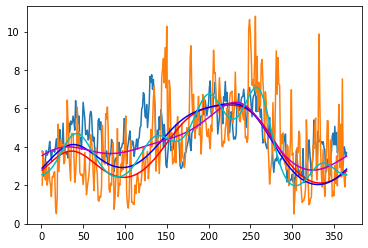

In [63]:
dsin = ds_clim_test_3d_all.sel(lat=34 , lon=255, quantile=0.85).isel(Lbeg=4)
x = dsin.target_clim.dt.dayofyear.values
#     print(x.shape)
y = dsin.pr_sfc.values

num_armonics = 7
popt1, pcov = curve_fit(fffourierB, x,y, [0.0] * num_armonics, bounds=[-20,20], 
                       max_nfev=3000, loss='cauchy')
print(popt1)

dsin = ds_clim_test_3d_all.sel(lat=34 , lon=255, quantile=0.85).isel(Lbeg=5)
x = dsin.target_clim.dt.dayofyear.values
#     print(x.shape)
y = dsin.pr_sfc.values

num_armonics = 7
popt2, pcov = curve_fit(fffourierB, x,y, [0.0] * num_armonics, bounds=[-20,20], 
                       max_nfev=3000, loss='cauchy')
num_armonics = 7
popt4, pcov = curve_fit(fffourierB, x,y,  [0.0] * 13, bounds=[-20,20], 
                       max_nfev=3000, loss='cauchy')
print(popt2)

dsin = ds_clim_test_3d_all.sel(lat=34 , lon=255, quantile=0.85)
x = dsin.target_clim.dt.dayofyear.values
#     print(x.shape)
y1 = dsin.pr_sfc.isel(Lbeg=0).values
y2 = dsin.pr_sfc.isel(Lbeg=1).values

xt = np.concatenate((x,x+366))
yt = np.concatenate((y1,y2))
num_armonics = 7
popt3, pcov = curve_fit(fffourierB, xt,yt, [0.0] * num_armonics, bounds=[-20,20], 
                       max_nfev=3000, loss='cauchy')
print(popt3)


out1 = fffourierB(x, *popt1)
out2 = fffourierB(x, *popt2)
out3 = fffourierB(x, *popt3)
out4 = fffourierB(x, *popt4)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x, out1, 'r')
plt.plot(x, out2, 'b')
plt.plot(x, out3, 'm')
plt.plot(x, out4, 'c')


In [70]:
smooth_clim_cauchy.isel(Lbeg=np.array([1,4,5]))

<xarray.Dataset>
Dimensions:      (Lbeg: 3, lat: 28, lon: 71, target_clim: 365)
Coordinates:
  * Lbeg         (Lbeg) object '4-12' '6-14' '8-16'
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, lat, lon) float64 nan nan nan ... nan nan

In [158]:
ds_clim_test_3d_all

<xarray.Dataset>
Dimensions:      (Lbeg: 6, lat: 28, lon: 71, quantile: 5, target_clim: 365)
Coordinates:
  * quantile     (quantile) float64 0.15 0.33 0.5 0.667 0.85
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, quantile, lat, lon) float64 3.574 ... 12.7

/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


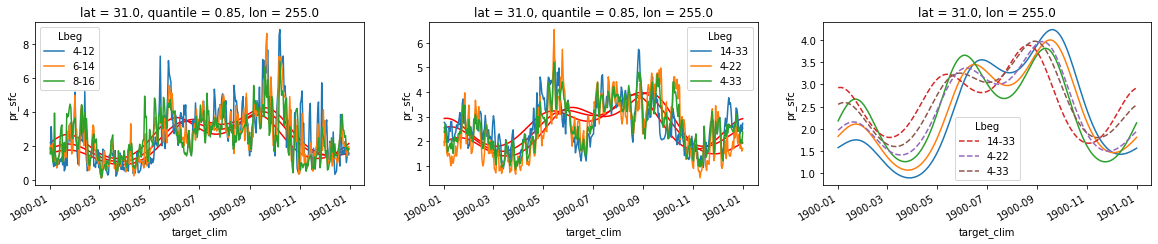

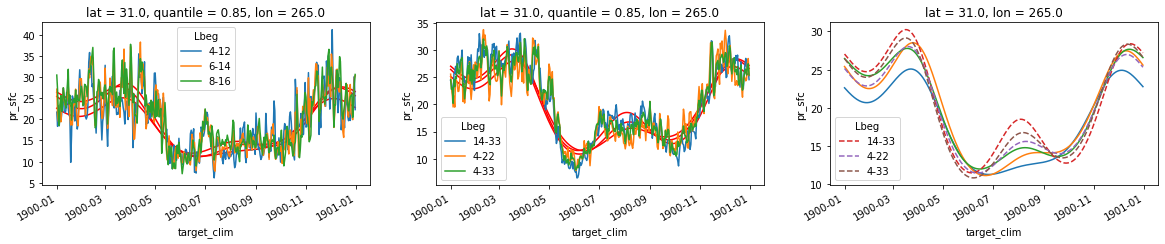

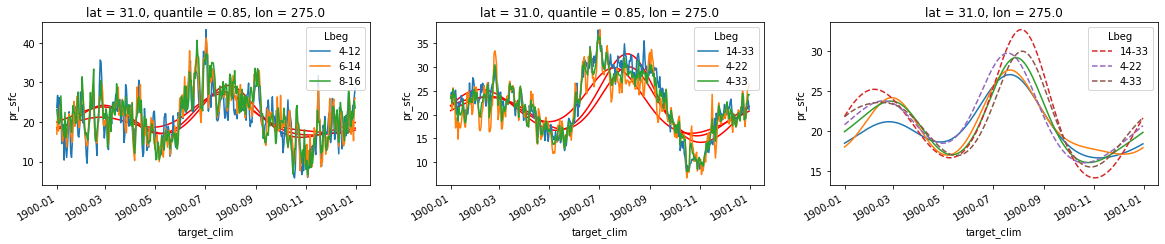

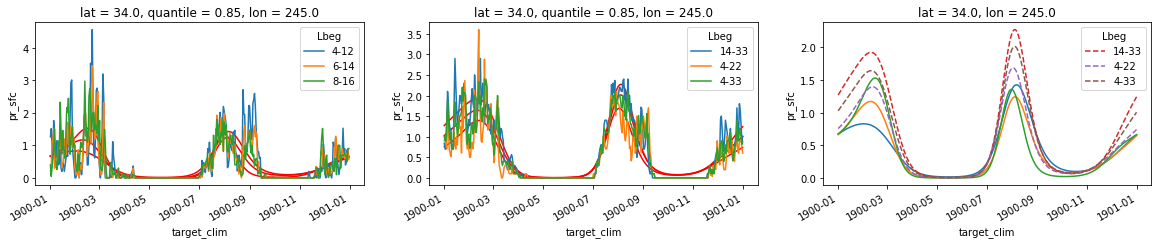

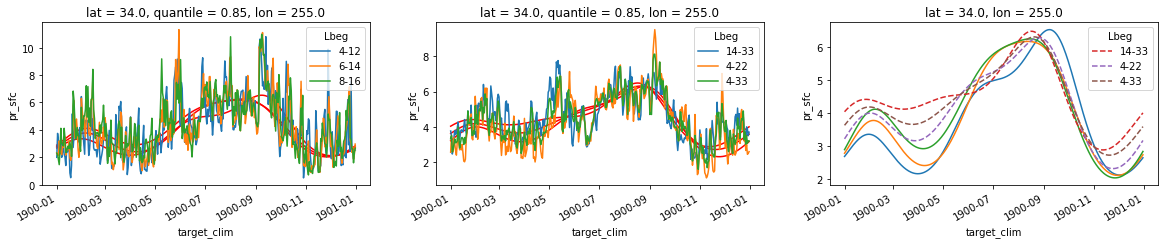

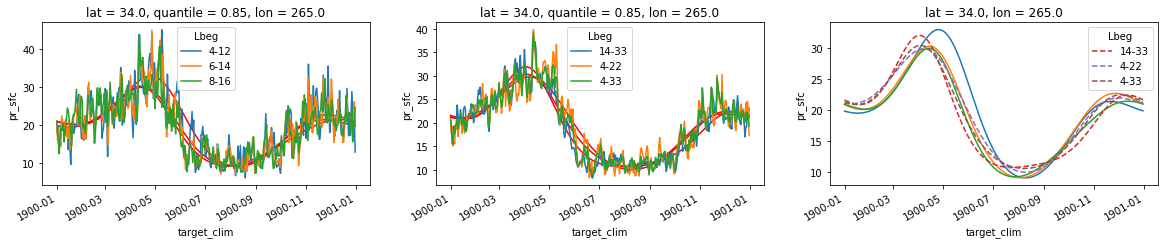

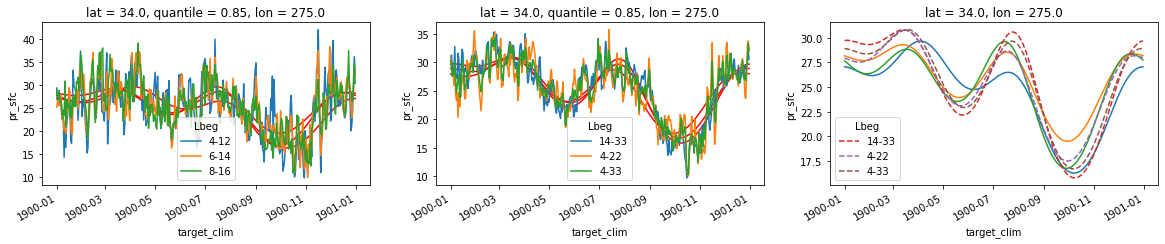

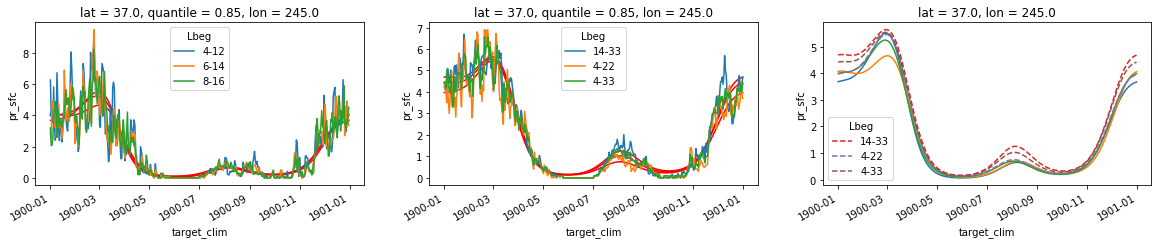

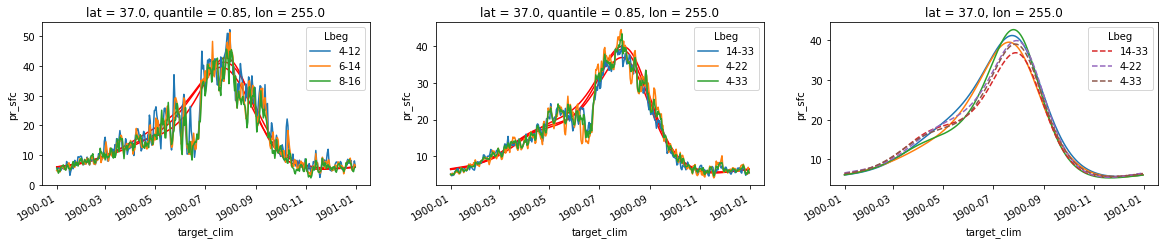

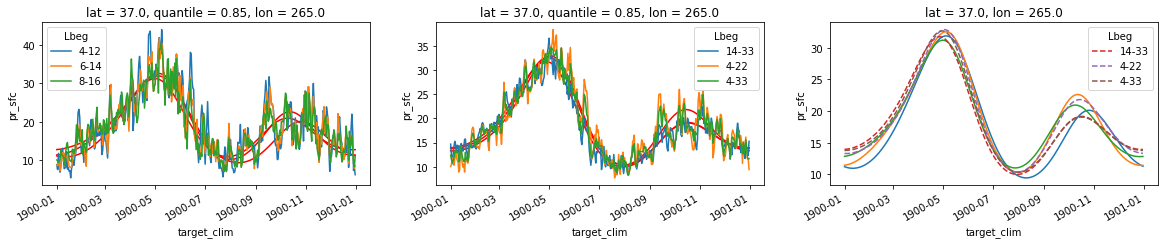

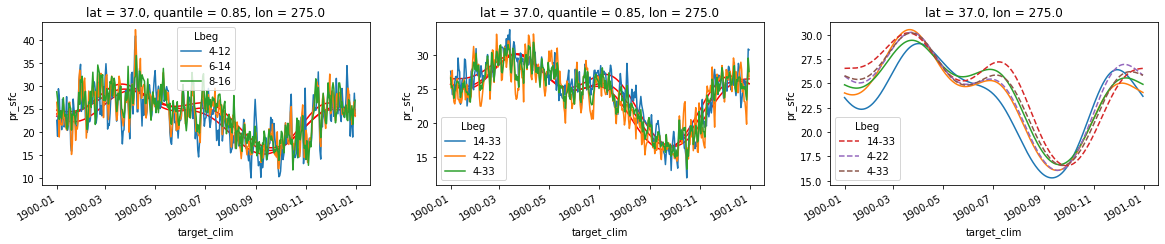

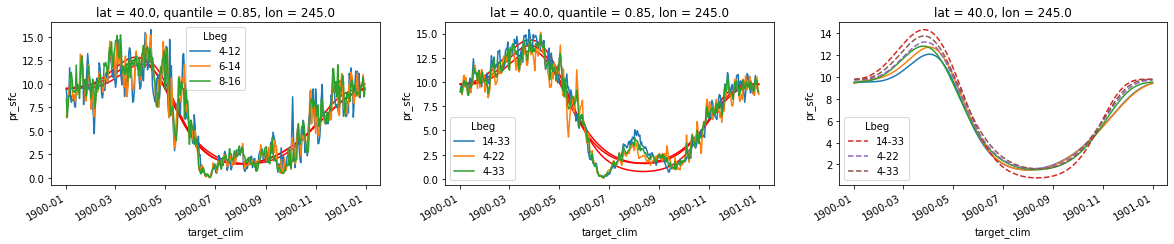

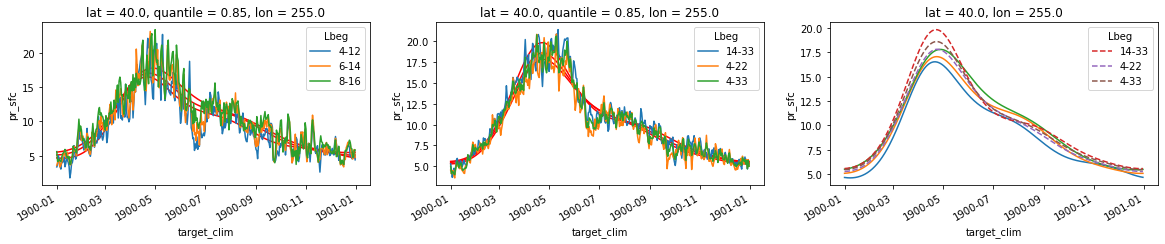

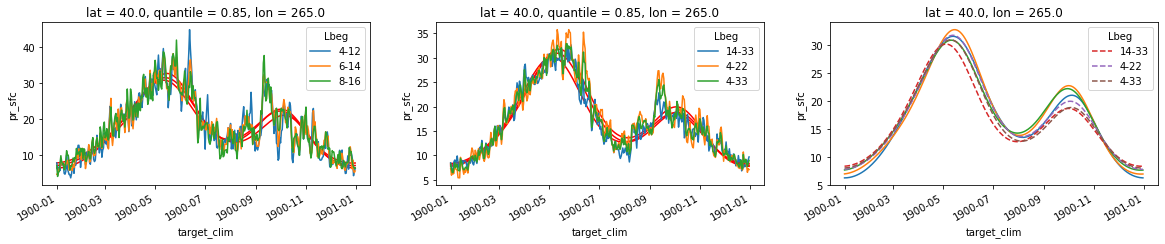

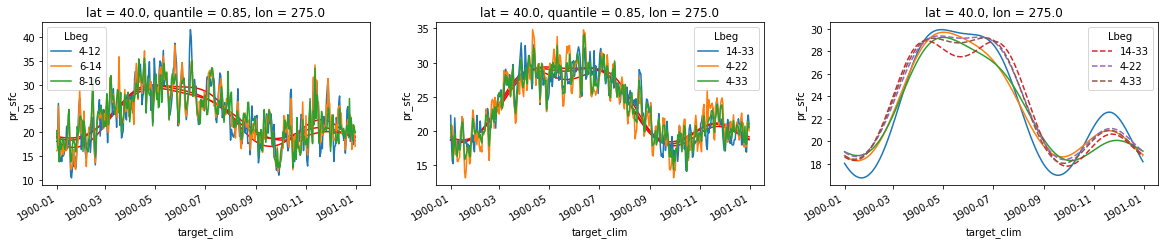

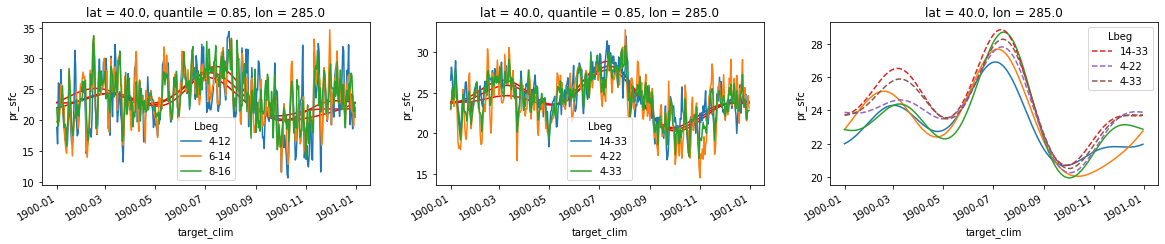

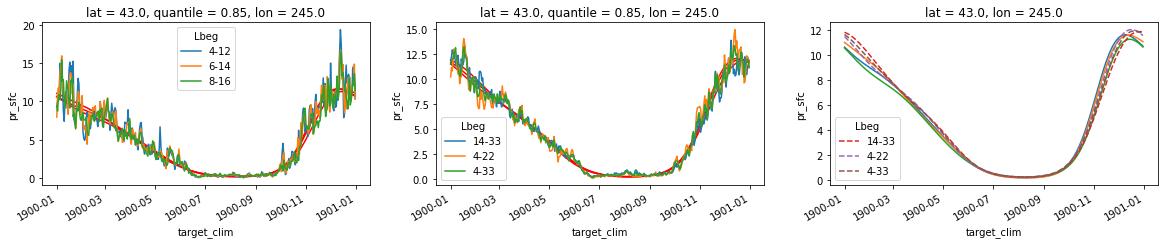

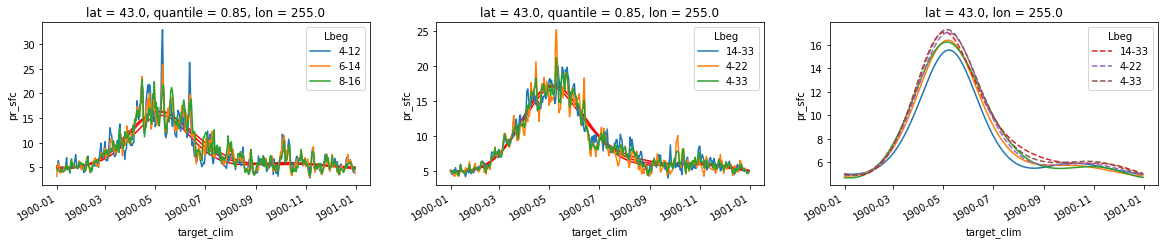

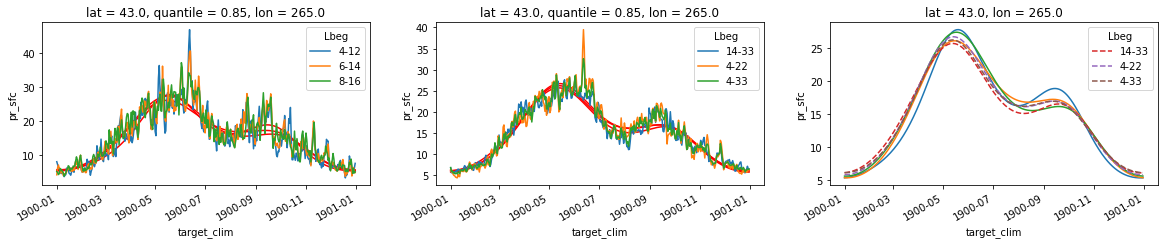

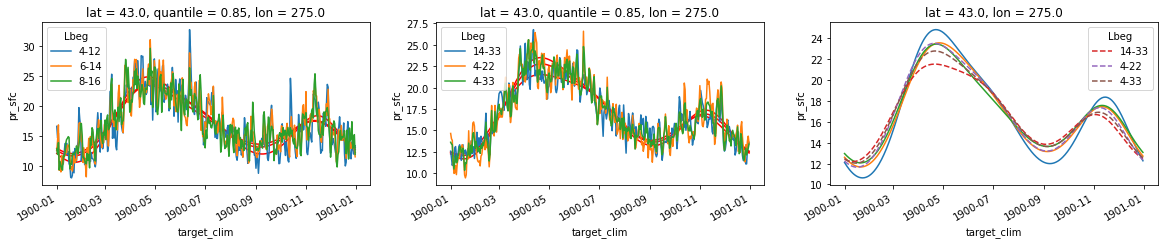

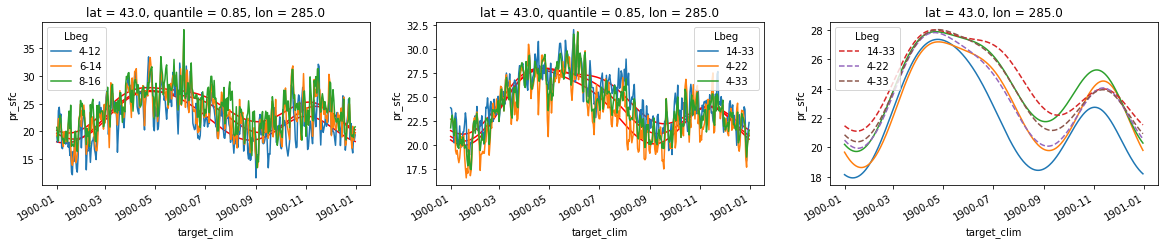

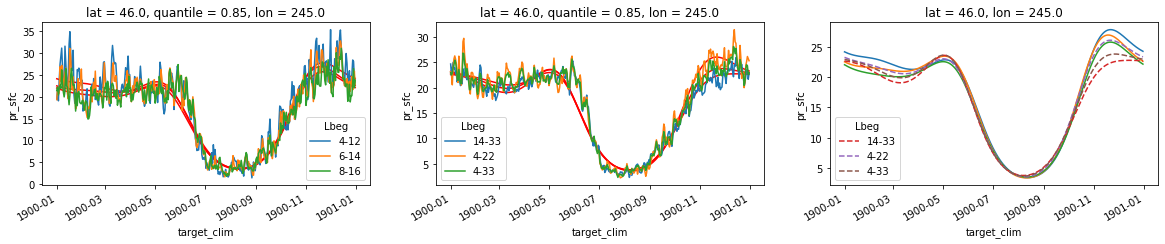

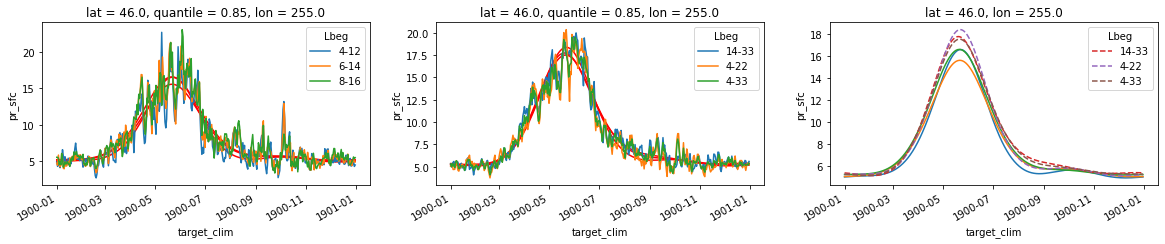

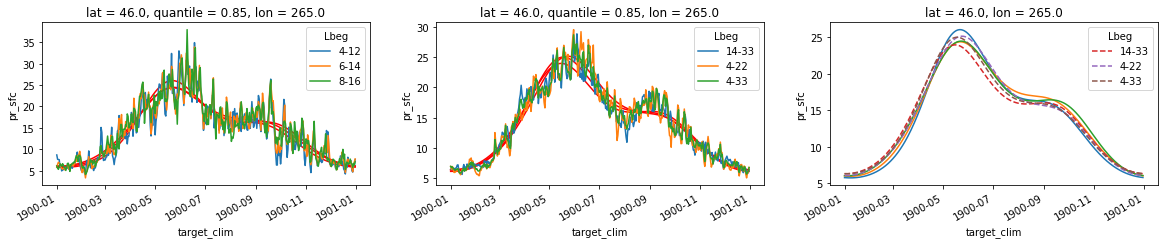

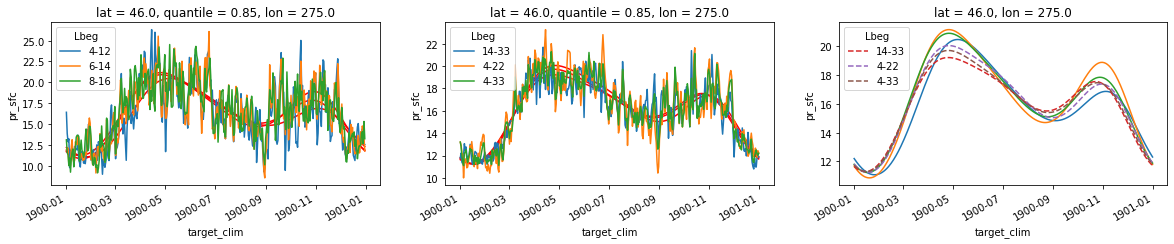

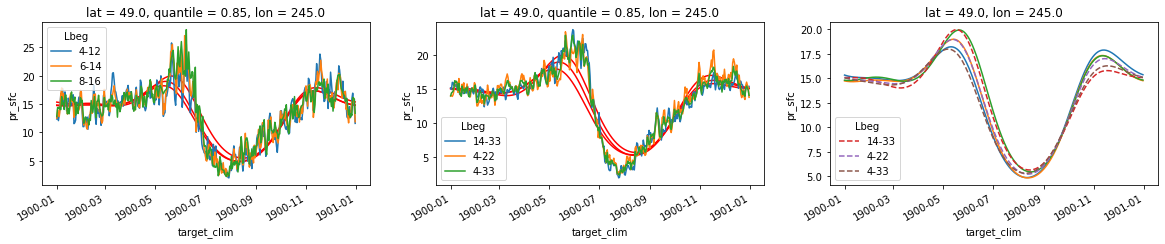

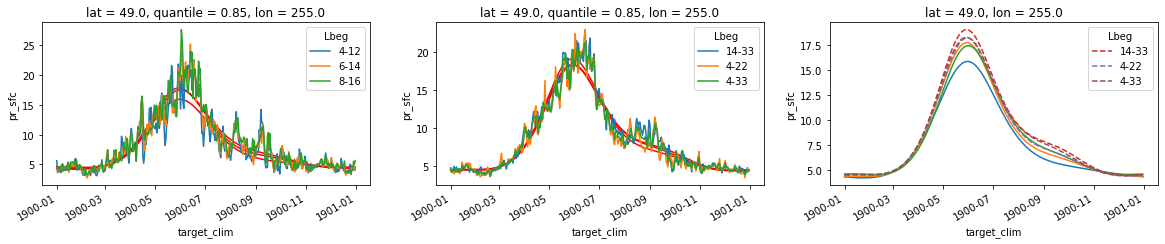

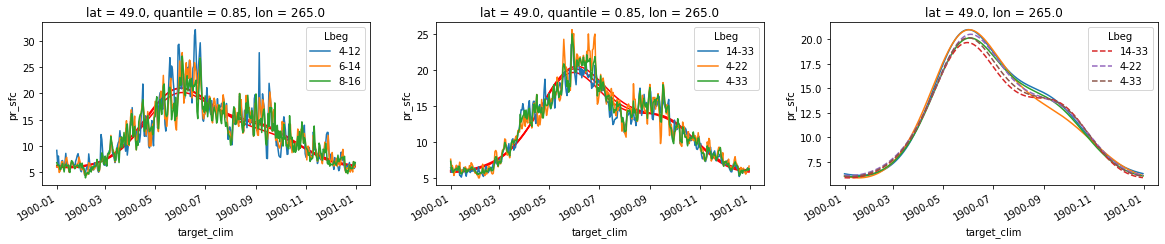

In [72]:
for ilat in np.arange(25,51,3):
    for ilon in np.arange(235,301,10):
        if np.sum(np.isnan(ds_clim_test_3d_all.where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).values))==0:
            plt.figure(figsize=(20,3))
            ax = plt.subplot(131)
#             smooth_clim_soft.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('b',x='target_clim')
            smooth_clim_cauchy.isel(Lbeg=np.array([1,4,5])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('r',ax=ax, x='target_clim')
            ds_clim_test_3d_all.isel(Lbeg=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax, x='target_clim')
            ax = plt.subplot(132)
#             smooth_clim_soft.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('b',x='target_clim')
            smooth_clim_cauchy.isel(Lbeg=np.array([0,2,3])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('r',ax=ax, x='target_clim')
            ds_clim_test_3d_all.isel(Lbeg=np.array([0,2,3])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax, x='target_clim')
        
            ax = plt.subplot(133)
            smooth_clim_cauchy.isel(Lbeg=np.array([1,4,5])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax, x='target_clim')
            smooth_clim_cauchy.isel(Lbeg=np.array([0,2,3])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('--',ax=ax, x='target_clim')


In [73]:
smooth_clim_cauchy

<xarray.Dataset>
Dimensions:      (Lbeg: 6, lat: 28, lon: 71, target_clim: 365)
Coordinates:
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, lat, lon) float64 nan nan nan ... nan nan

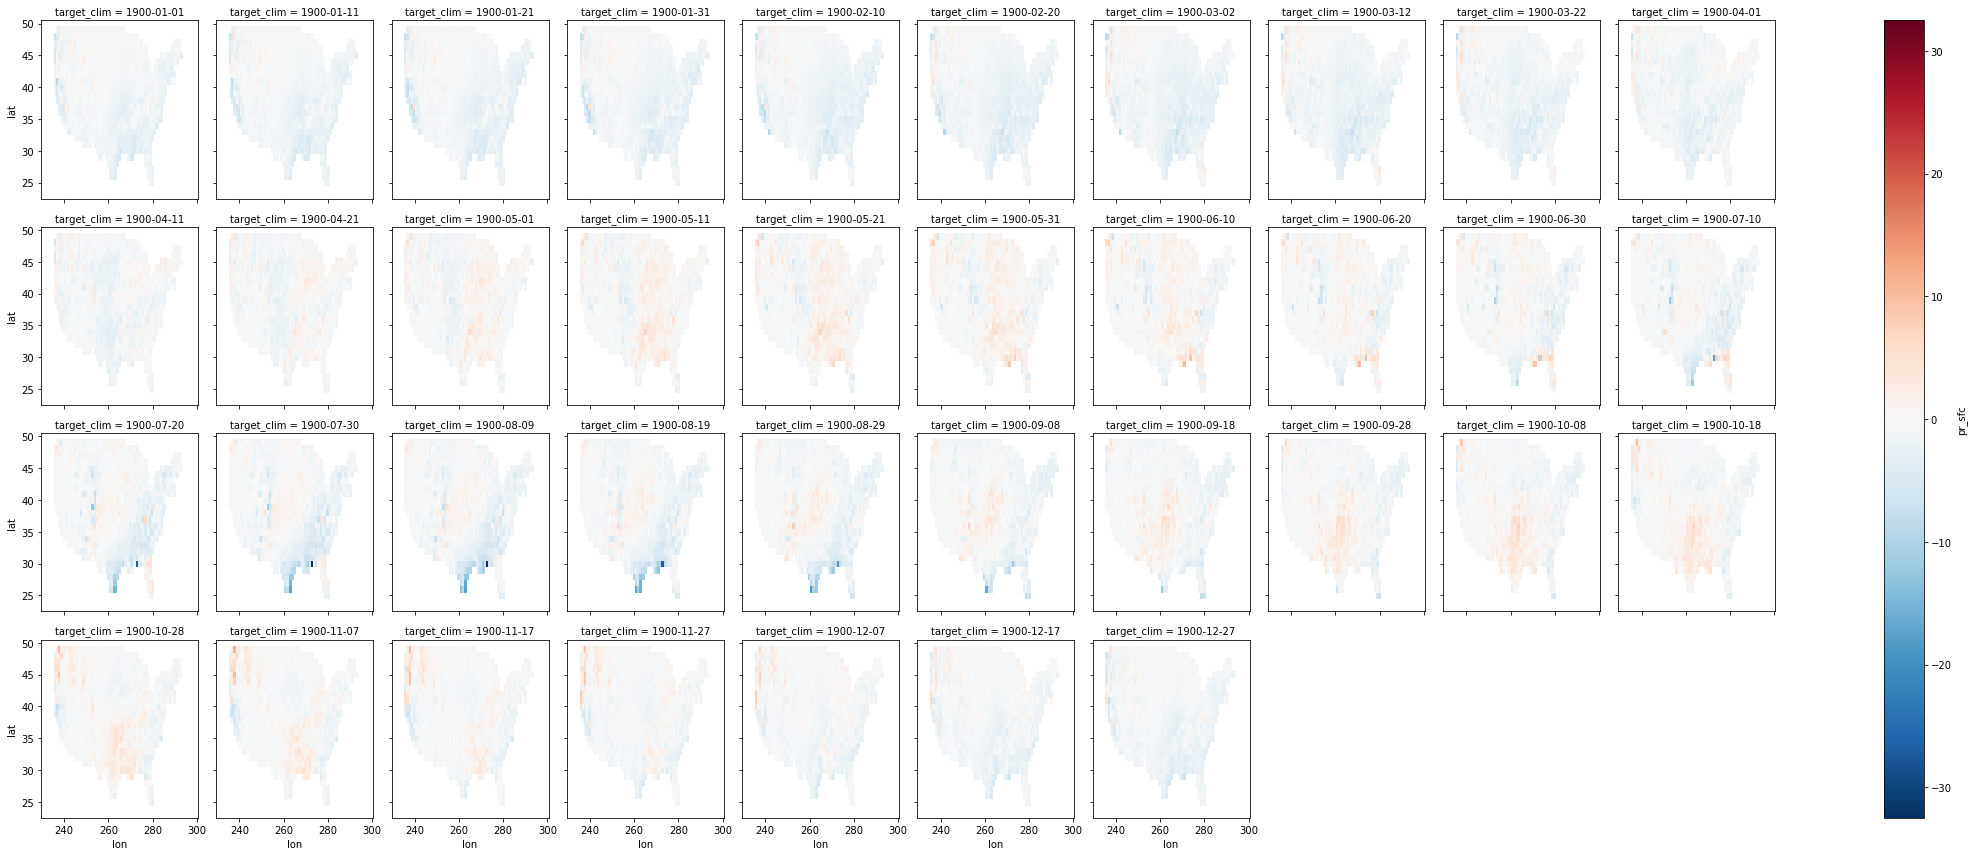

In [108]:
(smooth_clim_cauchy.pr_sfc[:,1]-smooth_clim_cauchy.pr_sfc[:,3])[::10].plot(col='target_clim',
                                                                           col_wrap=10, cmap='RdBu_r')

In [109]:
smooth_clim_cauchy

<xarray.Dataset>
Dimensions:      (Lbeg: 6, lat: 28, lon: 71, target_clim: 365)
Coordinates:
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, lat, lon) float64 nan nan nan ... nan nan

In [103]:
kwargs={'histtype':'step'}

/local/ERAin/lib/python3.6/site-packages/xarray/plot/plot.py:441: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  primitive = ax.hist(no_nan, **kwargs)
/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensu

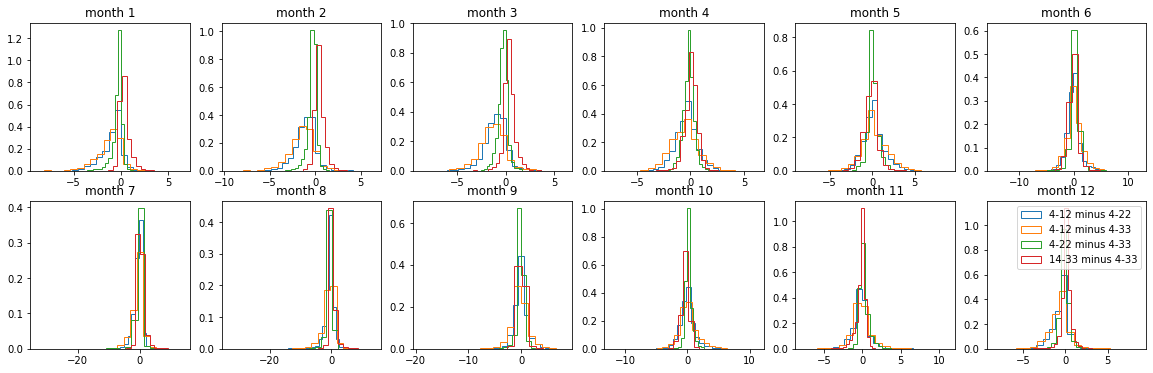

In [110]:
sg = (smooth_clim_cauchy.pr_sfc[:,1]-smooth_clim_cauchy.pr_sfc[:,2]).groupby('target_clim.month')
sg1 = (smooth_clim_cauchy.pr_sfc[:,1]-smooth_clim_cauchy.pr_sfc[:,3]).groupby('target_clim.month')
sg2 = (smooth_clim_cauchy.pr_sfc[:,2]-smooth_clim_cauchy.pr_sfc[:,3]).groupby('target_clim.month')
sg3 = (smooth_clim_cauchy.pr_sfc[:,0]-smooth_clim_cauchy.pr_sfc[:,3]).groupby('target_clim.month')
plt.figure(figsize=(20,6))
for k,isg in sg:
    ax = plt.subplot(2,6,k)
    isg.plot.hist(ax, bins=20, normed=True,**kwargs, label='4-12 minus 4-22')
    ax.set_title('month '+np.str(k))
    ax.set_xlabel('')
for k,isg in sg1:
    ax = plt.subplot(2,6,k)
    isg.plot.hist(ax, bins=20, normed=True,**kwargs, label='4-12 minus 4-33')
    ax.set_title('month '+np.str(k))
    ax.set_xlabel('')
for k,isg in sg2:
    ax = plt.subplot(2,6,k)
    isg.plot.hist(ax, bins=20, normed=True,**kwargs, label='4-22 minus 4-33')
    ax.set_title('month '+np.str(k))
    ax.set_xlabel('')
for k,isg in sg3:
    ax = plt.subplot(2,6,k)
    isg.plot.hist(ax, bins=20, normed=True,**kwargs, label='14-33 minus 4-33')
    ax.set_title('month '+np.str(k))
    ax.set_xlabel('')
ax.legend()

/local/ERAin/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


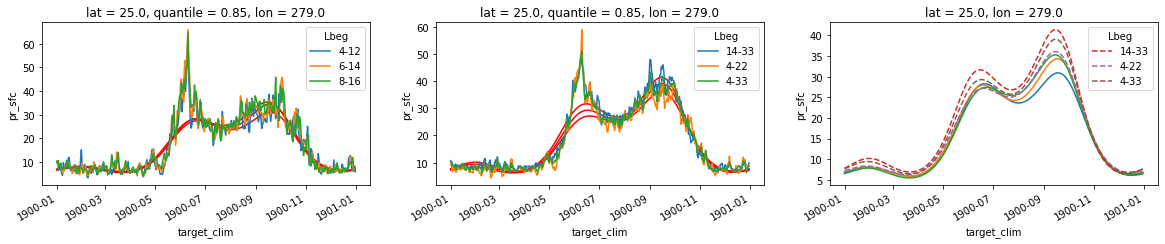

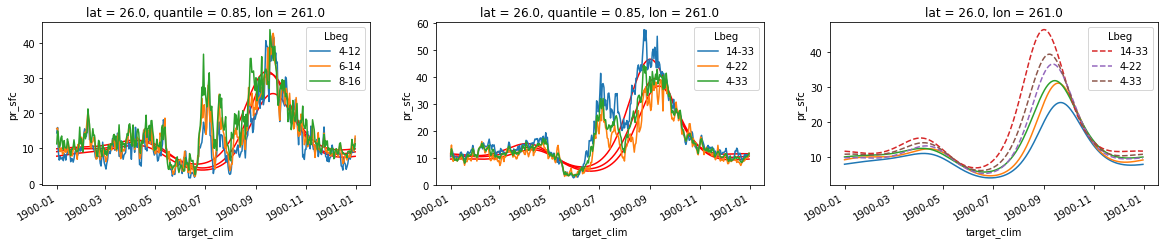

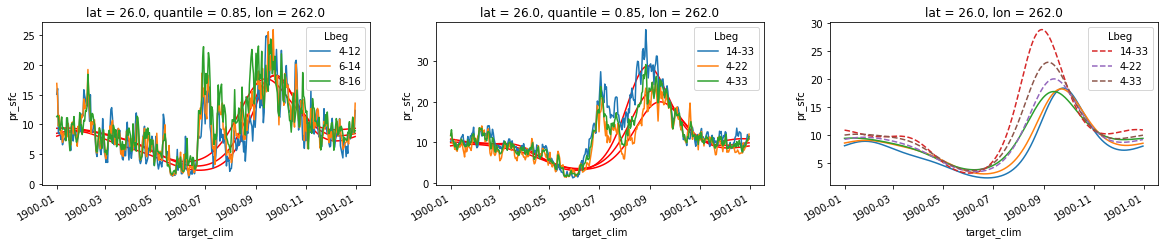

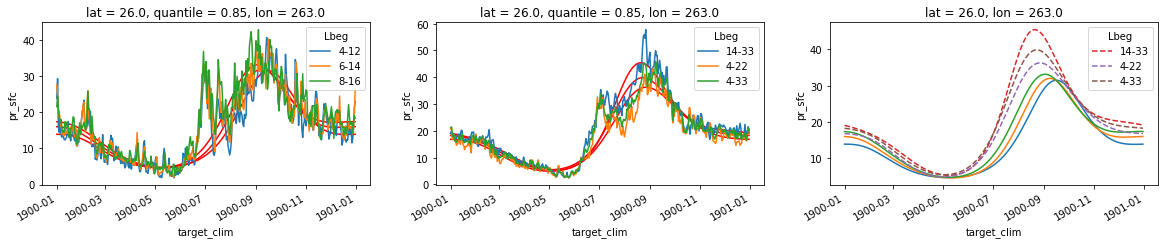

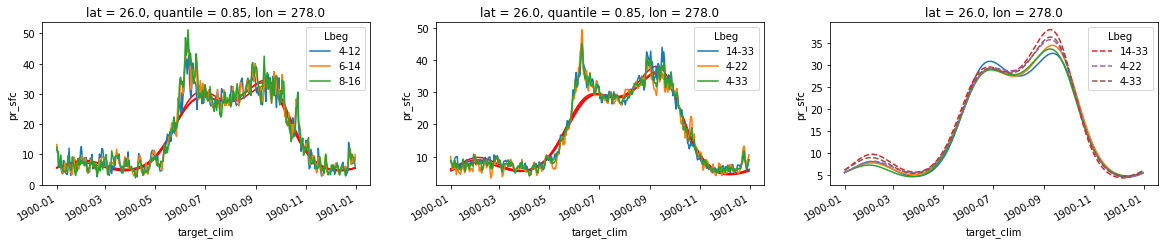

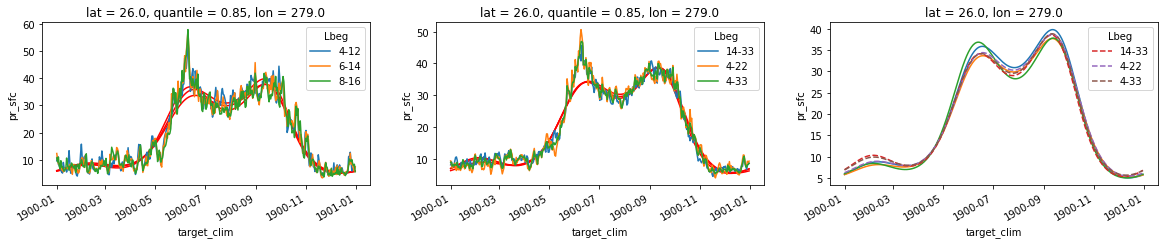

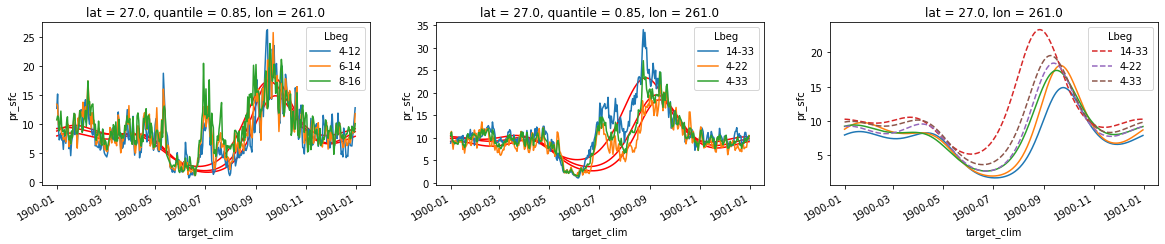

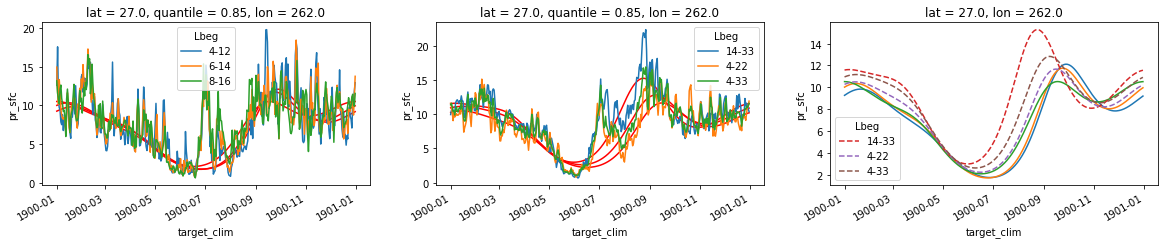

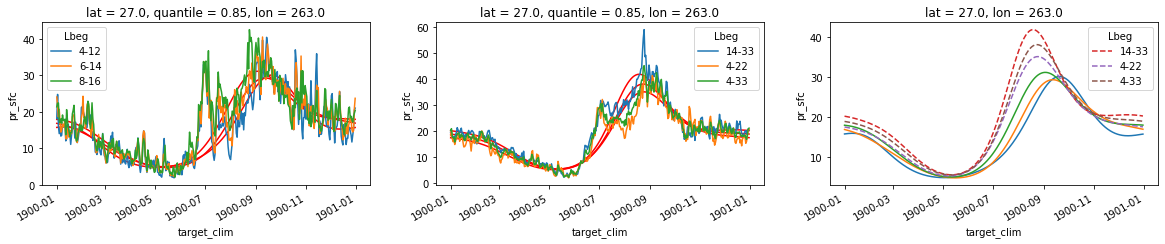

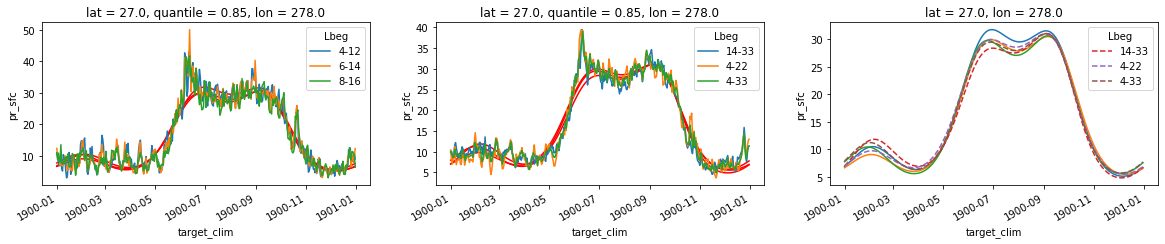

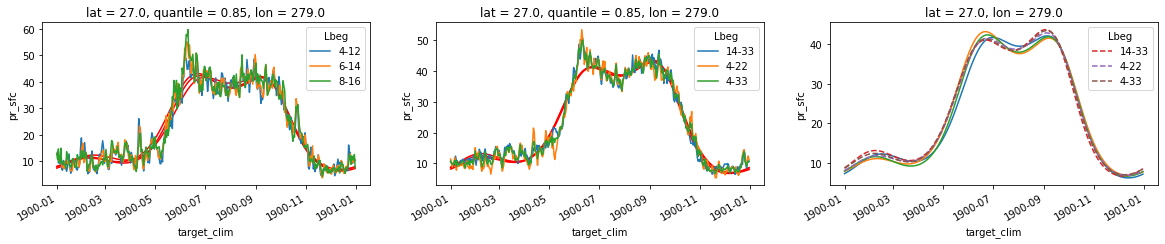

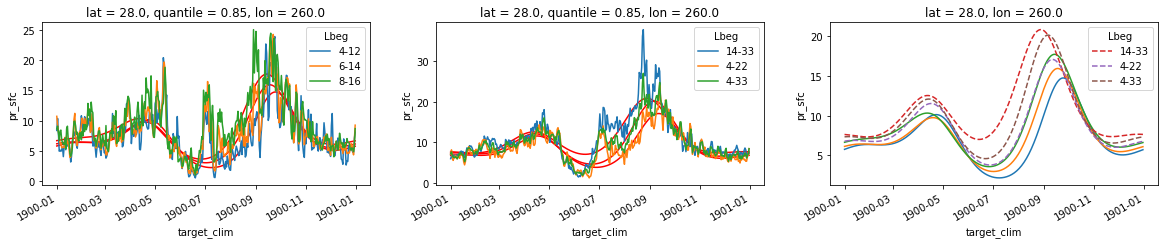

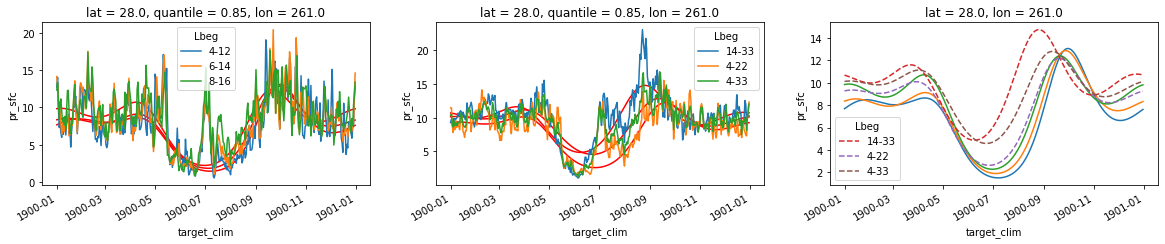

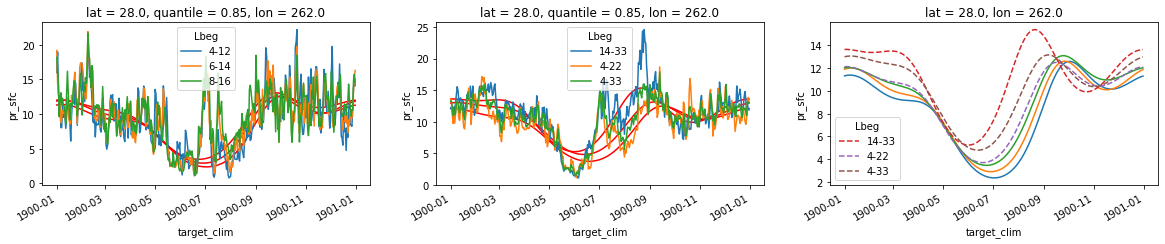

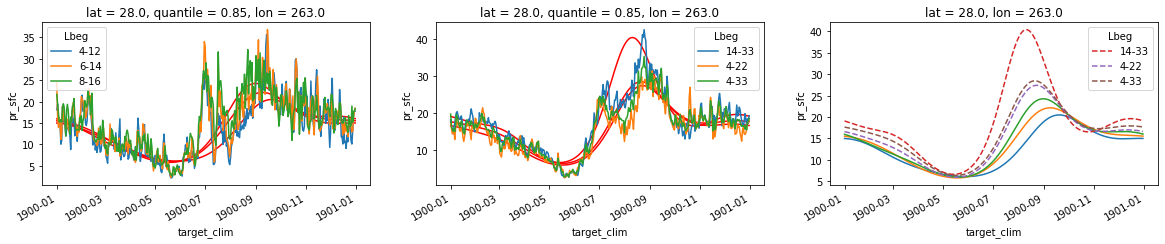

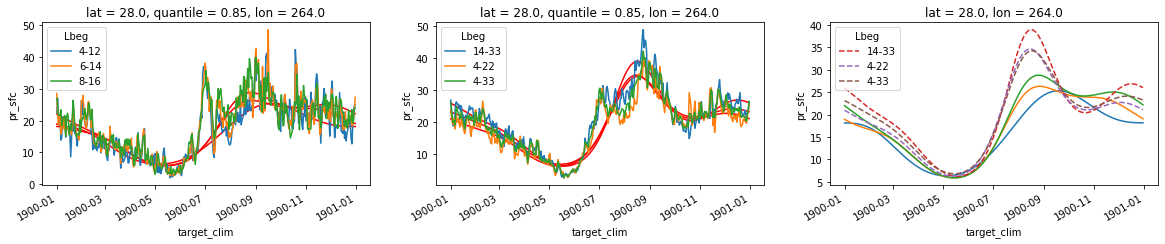

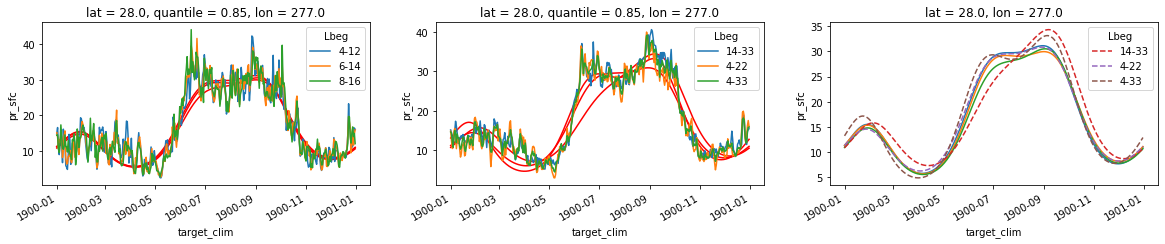

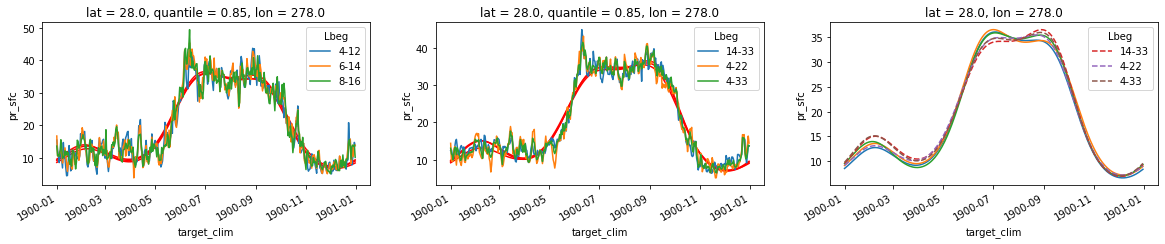

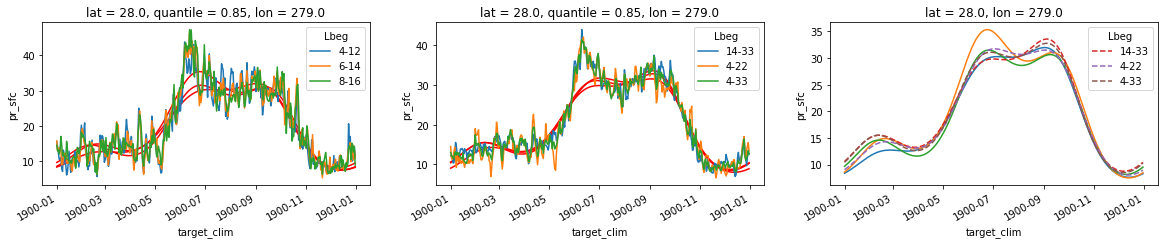

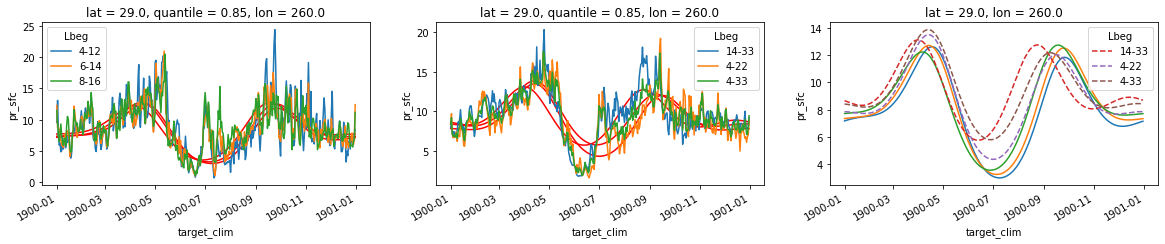

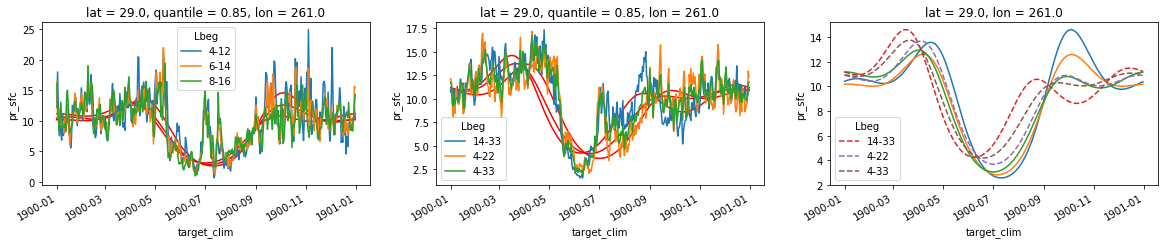

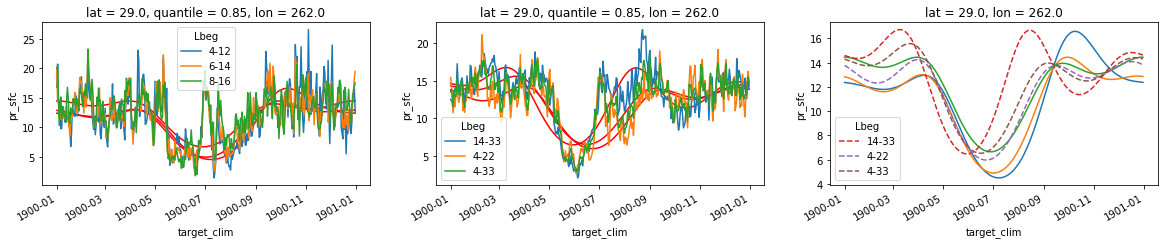

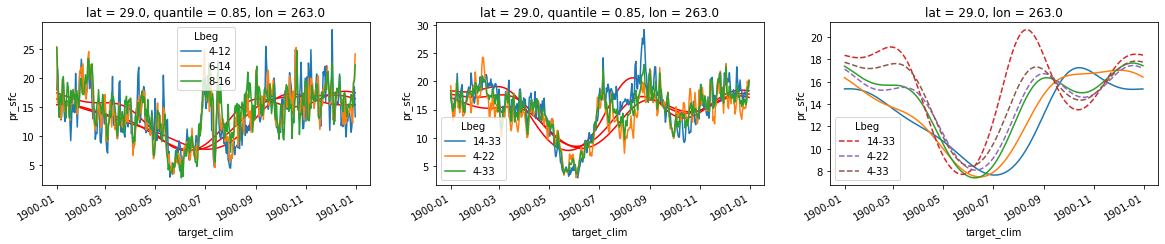

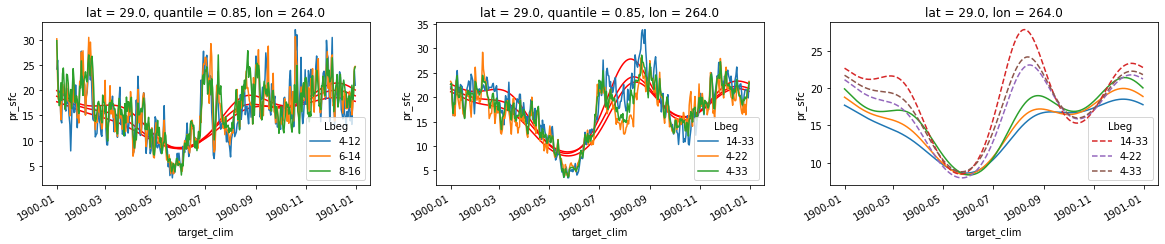

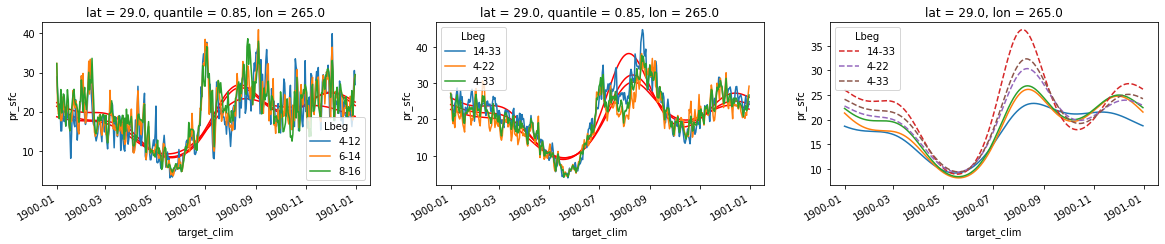

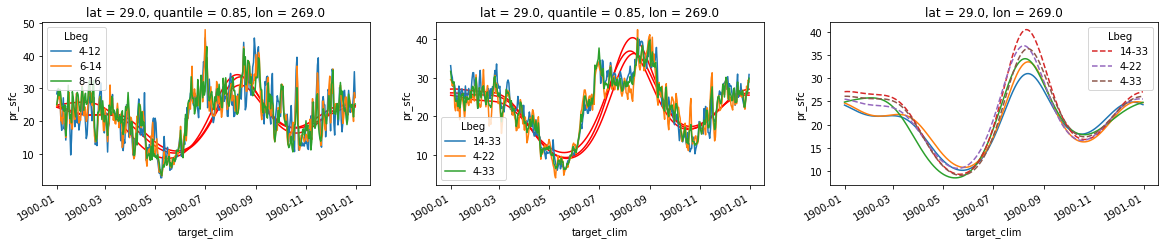

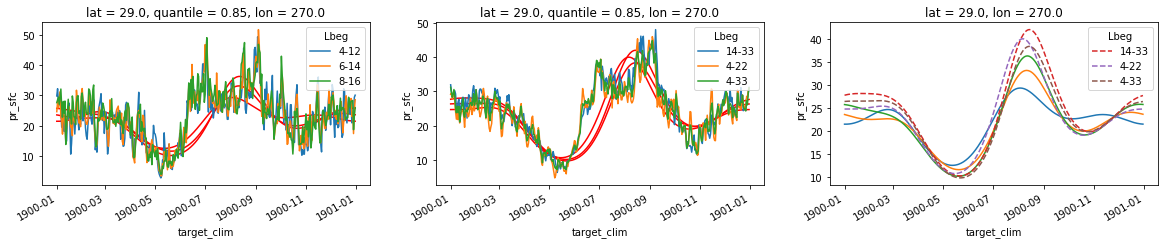

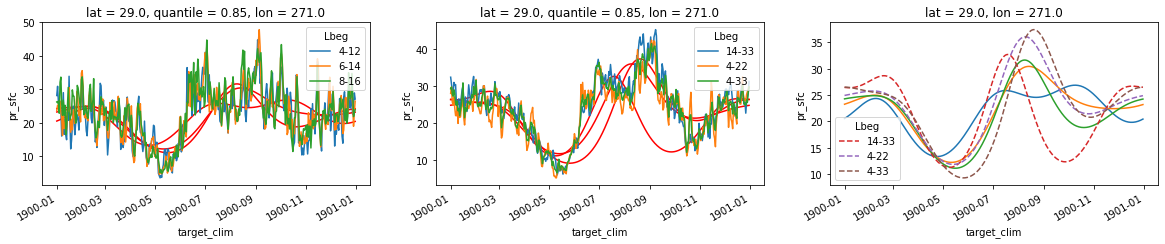

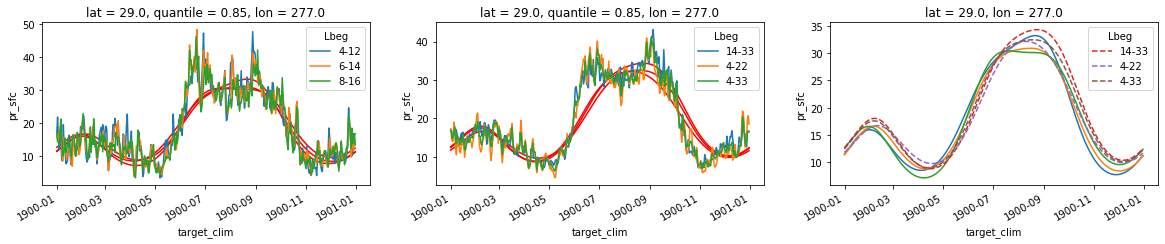

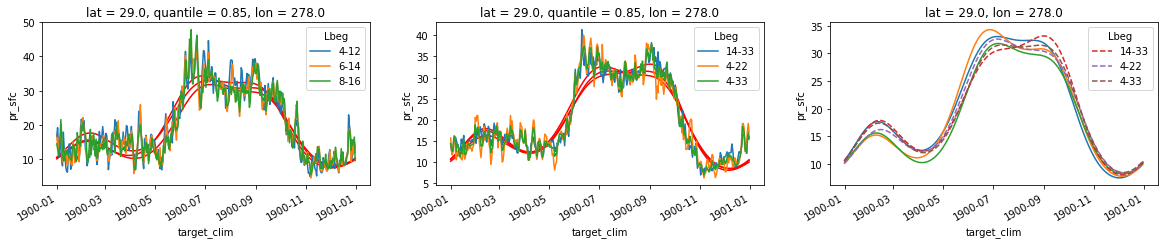

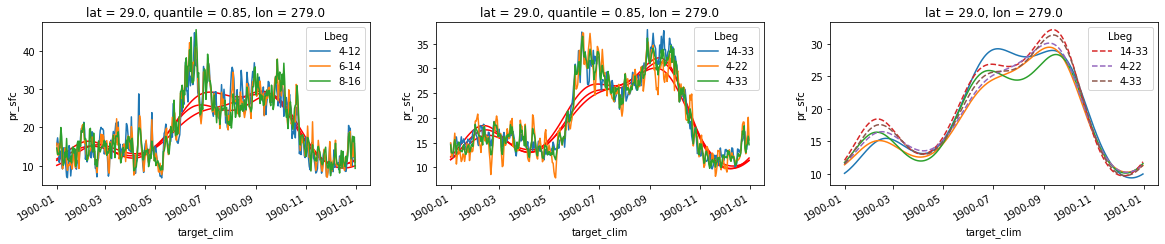

In [82]:
for ilat in np.arange(25,30,1):
    for ilon in np.arange(260,280,1):
        if np.sum(np.isnan(ds_clim_test_3d_all.where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).values))==0:
            plt.figure(figsize=(20,3))
            ax = plt.subplot(131)
#             smooth_clim_soft.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('b',x='target_clim')
            smooth_clim_cauchy.isel(Lbeg=np.array([1,4,5])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('r',ax=ax, x='target_clim')
            ds_clim_test_3d_all.isel(Lbeg=np.array([1,4,5])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax, x='target_clim')
            ax = plt.subplot(132)
#             smooth_clim_soft.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('b',x='target_clim')
            smooth_clim_cauchy.isel(Lbeg=np.array([0,2,3])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('r',ax=ax, x='target_clim')
            ds_clim_test_3d_all.isel(Lbeg=np.array([0,2,3])).where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax, x='target_clim')
        
            ax = plt.subplot(133)
            smooth_clim_cauchy.isel(Lbeg=np.array([1,4,5])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax, x='target_clim')
            smooth_clim_cauchy.isel(Lbeg=np.array([0,2,3])).pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('--',ax=ax, x='target_clim')


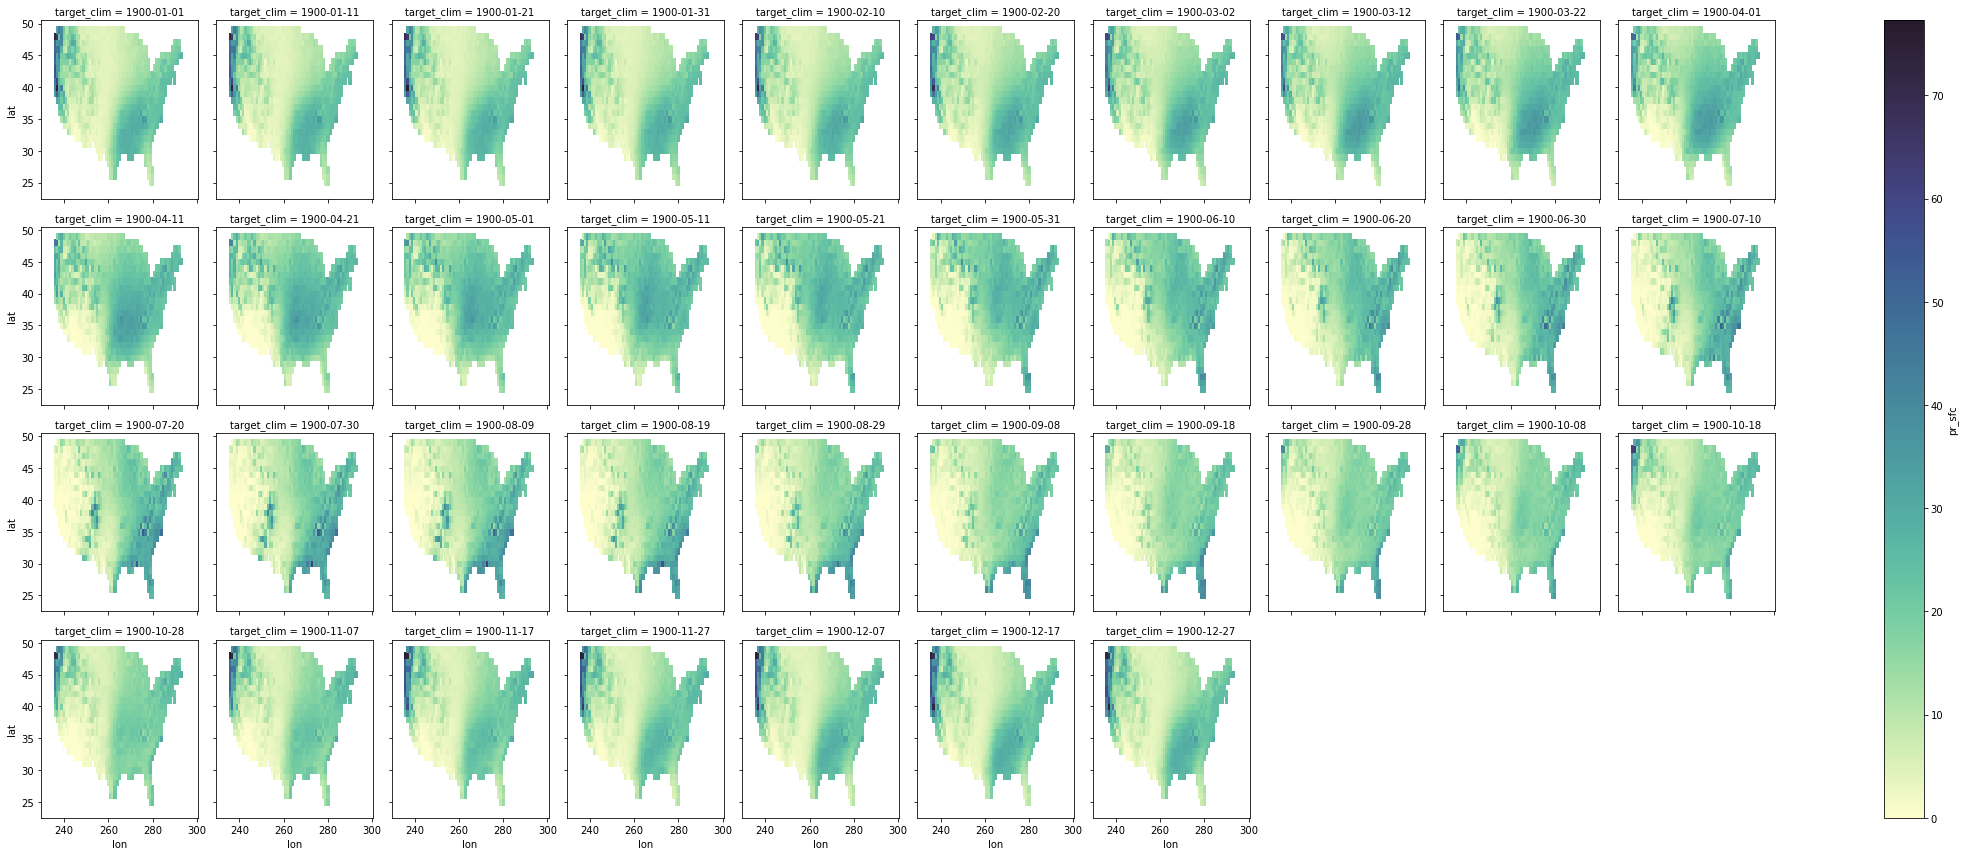

In [111]:
smooth_clim_cauchy.pr_sfc[::10,3].plot(col='target_clim',col_wrap=10, cmap=cmap)

In [115]:
smooth_clim_cauchy.pr_sfc.isel(Lbeg=3)

<xarray.DataArray 'pr_sfc' (target_clim: 365, lat: 28, lon: 71)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan

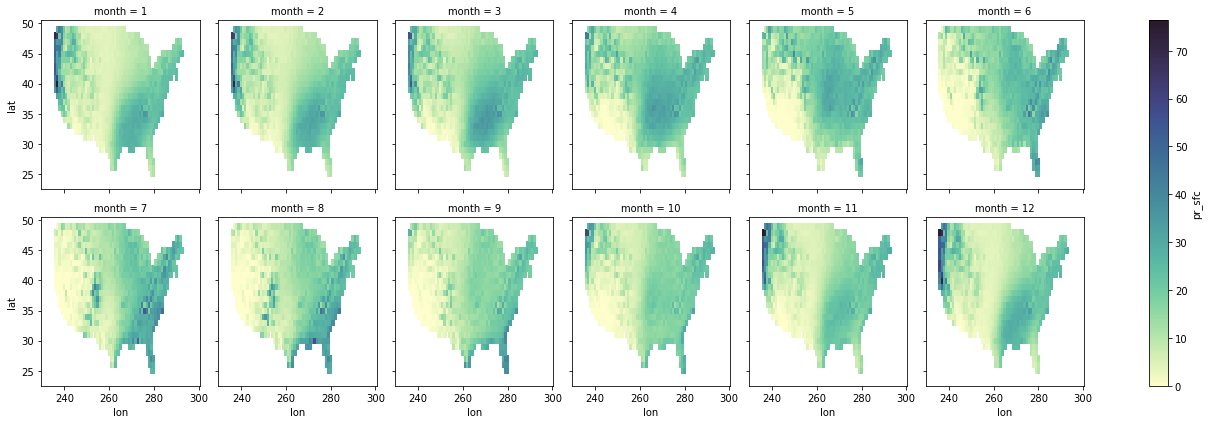

In [117]:
smooth_clim_cauchy.pr_sfc.isel(Lbeg=3).groupby('target_clim.month').mean().plot(col='month',col_wrap=6, cmap=cmap)

In [157]:
smooth_clim_cauchy.to_netcdf('smooth_clim_cauchy_aug2020.nc')

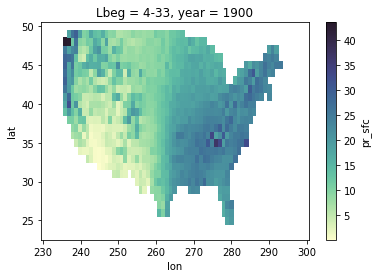

In [118]:
smooth_clim_cauchy.pr_sfc.isel(Lbeg=3).groupby('target_clim.year').mean().plot( cmap=cmap)

In [153]:
smooth_clim.coords

Coordinates:
  * Lbeg         (Lbeg) object '14-33' '4-12' '4-22' '4-33' '6-14' '8-16'
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31

In [156]:
# looping through the target dates for climatologies
import warnings
warnings.filterwarnings("ignore")

check_85 = []
for iT in target_all:
    # extract values that correspond to the target dates
    temp = all_variables_T3.where((all_variables_T3.target_time.dt.month==iT.month.values[0])&
                              (all_variables_T3.target_time.dt.day==iT.day.values[0]), drop=True)
    smooth_data = smooth_clim_cauchy.where((smooth_clim_cauchy.target_clim.dt.month==iT.month.values[0])&
                              (smooth_clim_cauchy.target_clim.dt.day==iT.day.values[0]), drop=True)
    # bits to extract the S and t of each target_time
    y_ls = [y for (x,y) in temp.St.values]
    y_arr = np.array(y_ls)
    # loop through the 3 types of lead times
    # I have the -1 because of the way the timedelta is centered at 0 day and 12hours for day 1
#     for different_lead1, different_lead2 in zip(np.array([1,7,13])-1, np.array([5,11,17])-1 ):
    check_85b  = []
    for different_lead1, different_lead2 in zip(np.array([8,10,12])-1, np.array([10,12,14])-1 ):
#         print(y_arr[(y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D'))])
        temp2 = temp.sel(target_time=
                         (y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D')))
        
        smooth_data2 = smooth_data.isel(Lbeg=0)
        #to match coordinates of the data
        smooth_data2 = smooth_data2.rename({'target_clim':'target_time'})
        diff  = temp2 - smooth_data2.isel(target_time=0) 
        diffs = diff.stack(values = ['M','target_time'])
        diffbool = xr.where(diffs.pr_sfc.where(ds_mask.the_geom>0)<0, 0,1)
        diffbool = diffbool.where(ds_mask.the_geom>0).sum('values')/diffbool.where(ds_mask.the_geom>0).count('values')
#         diffbool = diffbool.expand_dims('Lbeg')
        diffbool = diffbool.drop('Lbeg')
        diffbool = diffbool.expand_dims('target_time')
        diffbool.coords['target_time']= np.atleast_1d(iT)
        diffbool = diffbool.expand_dims('forecast_L')
#         diffbool.coords['forecast_L'] = 'forecast_L', [np.str(different_lead1+1)+'-'+np.str(different_lead2+1)] #np.atleast_1d(different_lead1+1)
        diffbool.coords['forecast_L'] = 'forecast_L', np.atleast_1d(different_lead1+1)
#       
        check_85b.append(diffbool)
    check_85b1 = xr.concat(check_85b, dim='forecast_L')    
    check_85.append(check_85b1)
# check_85 = xr.combine_by_coords(check_85)    
check_85_0 = xr.concat(check_85, dim='target_time')

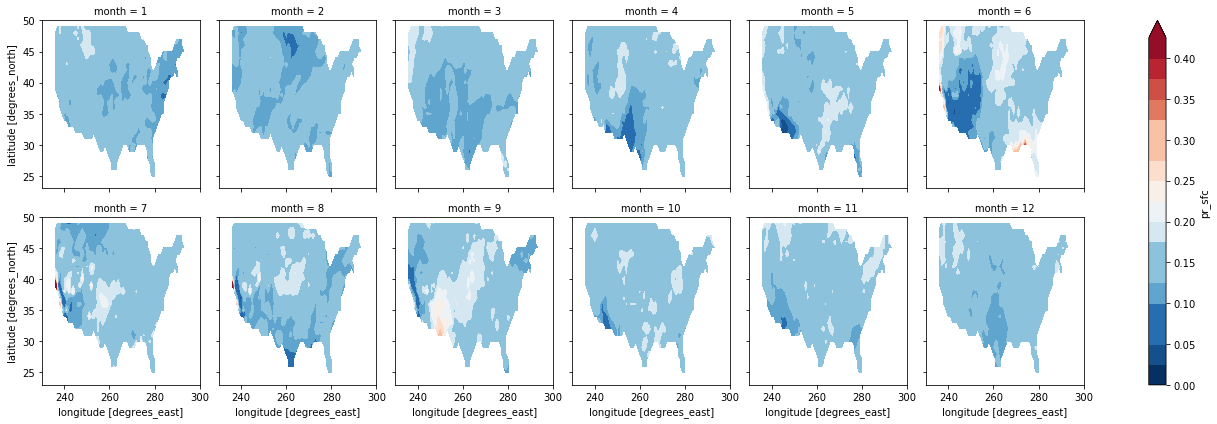

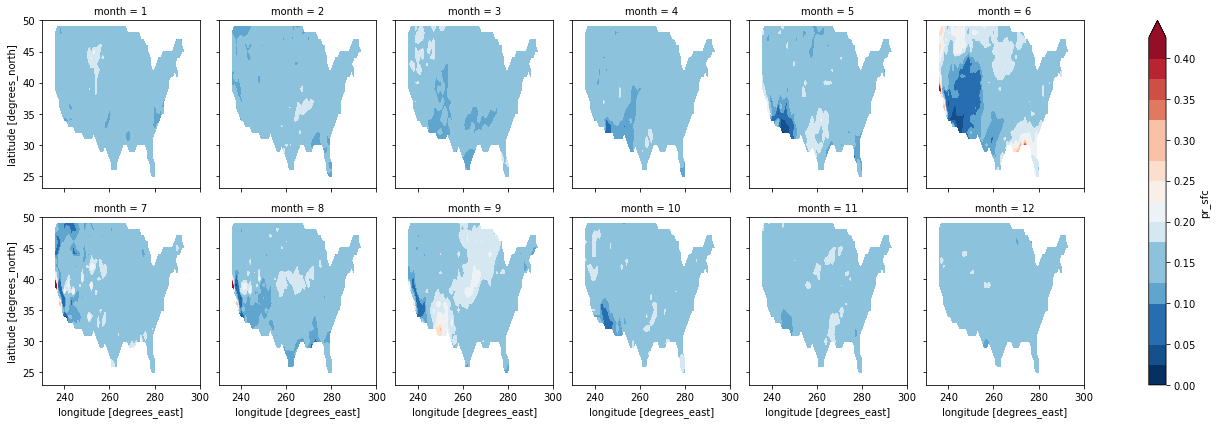

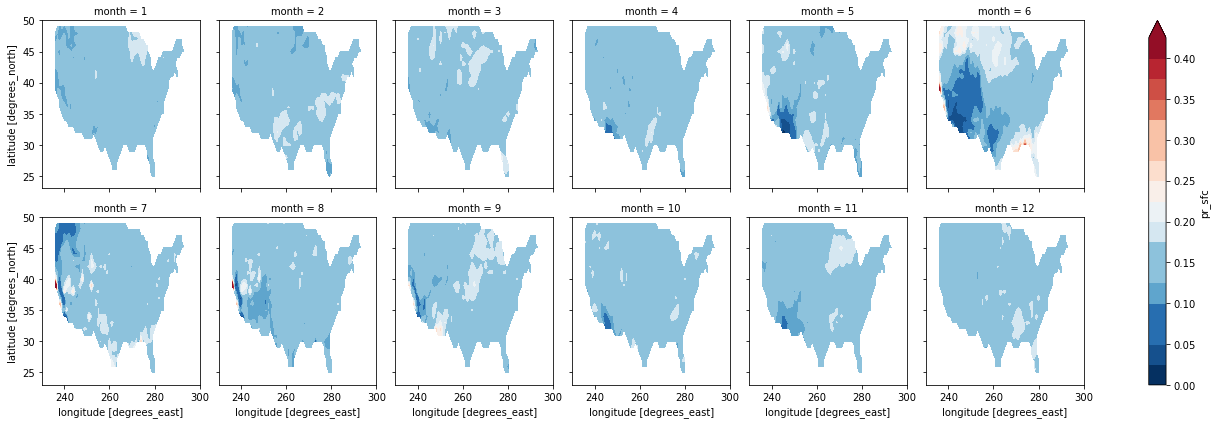

In [151]:
for il in np.arange(0,3):
    check_85.groupby('target_time.month').mean()[il].where(ds_mask.the_geom>0).plot.contourf(
        col='month', col_wrap=6, levels=np.arange(0, 0.45, 0.025), cmap = 'RdBu_r')

In [ ]:
for ilat in np.arange(25,51,3):
    for ilon in np.arange(235,301,10):
        if np.sum(np.isnan(ds_mask.the_geom.where(ds_mask.the_geom>0).sel(lat=ilat, lon=ilon).values))==0:
            plt.figure(figsize=(10,3))
            ax = plt.subplot(121)
            check_85.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line(ax = ax, x='target_time')
            ax = plt.subplot(122)
#             smooth_clim_soft.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('b',ax=ax,x='target_clim')
            ds_clim_test_3d_all.where(ds_mask.the_geom>0).pr_sfc[:,:,-1,:,:].sel(lat=ilat, lon=ilon).plot.line(ax=ax,x='target_clim')
            smooth_clim_cauchy.pr_sfc[:,:,:,:].sel(lat=ilat, lon=ilon).plot.line('k',ax=ax,x='target_clim')
